#**Parcial II Big data - Datos relacionados con nacimientos en Colombia**

Juan David Lopez - Ciencia de datos

Nicolas Samuel Martin Vasquez - Ciencia de datos / Estudios musicales

Juan Diego Gonzalez Jimenez - Ciencia de datos



 **Los siguientes datos fueron extraidos de datos.gov.co**


##**PREGUNTAS**
**Pregunta 1:** ¿Cómo cambia la salud de los bebés entre Bucaramanga y Rionegro?

**Importancia:**
Comparar los indicadores de salud neonatal entre Bucaramanga y Rio Negro es esencial para identificar diferencias en la atención medica y condiciones socioeconómicas que afectan a los recién nacidos. Esta comparación ayudará a desarrollar estrategias específicas para mejorar la atención prenatal y neonatal en cada región, y a implementar intervenciones localizadas que optimicen los resultados de salud de los recién nacidos y mejoren los procesos de atención materna e infantil
______________________________________________________________________________
**Pregunta 2:** ¿Qué factores están asociados con los nacimientos prematuros (período de gestación menor a 37 semanas) en Bucaramanga y Río Negro?

 **Importancia:**
Identificar los factores asociados con los nacimientos prematuros en Bucaramanga y Río Negro es crucial para reducir la morbilidad y mortalidad neonatal. Conocer estos factores permitirá diseñar intervenciones específicas y asignar recursos de manera más efectiva para apoyar a las mujeres embarazadas de alto riesgo. Además, los hallazgos pueden utilizarse para educar a las futuras madres sobre los riesgos y las medidas preventivas asociadas con los nacimientos prematuros, mejorando la salud neonatal y los resultados de los embarazos en ambas regiones

## **ACCESO A DRIVE PARA EXTRACCION DE DATOS OPTIMA**

In [ ]:
from google.colab import drive ##Para poder darle acceso a los archivos de drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##**Carga de Librerias que usaremos**

In [ ]:
###Librerias

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
import numpy as np

#**Dataframe Rio Negro**

###**Atributos Dataset**
Se hace una breve explicación de cada uno:


1. **DEPARTAMENTO**: Nombre del departamento donde se registra el nacimiento.
2. **MUNICIPIO**: Nombre del municipio donde ocurre el nacimiento.
3. **AREA NACIMIENTO**: Área donde ocurre el nacimiento (urbano o rural).
4. **SEXO**: Sexo del recién nacido.
5. **PESO (Gramos)**: Peso del bebé al nacer, expresado en gramos.
6. **TALLA (Centímetros)**: Estatura del bebé al nacer, expresada en centímetros.
7. **FECHA NACIMIENTO**: Fecha exacta del nacimiento.
8. **TIEMPO DE GESTACIÓN**: Duración del embarazo expresada en semanas.
9. **NÚMERO CONSULTAS PRENATALES**: Cantidad de consultas médicas prenatales asistidas por la madre durante el embarazo.
10. **TIPO PARTO**: Método por el cual se realizó el parto (natural, cesárea, etc.).
11. **MULTIPLICIDAD EMBARAZO**: Indica si fue un embarazo simple o múltiple (gemelos, trillizos, etc.).
12. **EDAD MADRE**: Edad de la madre al momento del parto.
13. **EDAD PADRE**: Edad del padre al momento del parto.


###Carga de los datos

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns


# Ruta al archivo CSV en Google Drive
file_path = "/content/drive/MyDrive/Procesamiento de Datos a Gran Escala/Nacidos_Hospital_San_Juan_de_Dios_Rionegro__Ant._A_o_2021_20240513.csv"

# Cargar el archivo CSV en un DataFrame
dff = pd.read_csv(file_path)

In [ ]:
dff.head(5)

,DEPARTAMENTO,MUNICIPIO,AREA NACIMIENTO,SEXO,PESO (Gramos),TALLA (Centímetros),FECHA NACIMIENTO,TIEMPO DE GESTACIÓN,NÚMERO CONSULTAS PRENATALES,TIPO PARTO,MULTIPLICIDAD EMBARAZO,EDAD MADRE,EDAD PADRE
0,ANTIOQUIA,RIONEGRO,CABECERA MUNICIPAL,MASCULINO,3890,48,'31/12/2021,37,5,CESÁREA,SIMPLE,17(4),21(4)
1,ANTIOQUIA,RIONEGRO,CABECERA MUNICIPAL,MASCULINO,3040,48,'31/12/2021,39,4,ESPONTÁNEO,SIMPLE,19(4),20(4)
2,ANTIOQUIA,RIONEGRO,CABECERA MUNICIPAL,MASCULINO,3200,49,'31/10/2021,38,6,ESPONTÁNEO,SIMPLE,32(4),41(4)
3,ANTIOQUIA,RIONEGRO,CABECERA MUNICIPAL,FEMENINO,2960,48,'31/10/2021,40,6,ESPONTÁNEO,SIMPLE,20(4),21(4)
4,ANTIOQUIA,RIONEGRO,CABECERA MUNICIPAL,MASCULINO,2800,48,'31/10/2021,39,8,ESPONTÁNEO,SIMPLE,31(4),31(4)


# **LIMPIEZA**

## Manejo de valores faltantes

In [ ]:
# Verificar si hay valores faltantes en el DataFrame
missing_values = dff.isnull().sum()
print("Valores faltantes por columna:")
print(missing_values)

# Opción: Eliminar filas con valores faltantes
dff_cleaned = dff.dropna()

# Imputar valores faltantes con la mediana
#peso_median = dff['PESO (Gramos)'].median()
#dff['PESO (Gramos)'].fillna(peso_median, inplace=True)
# Esto se ahria si existieran valores faltantes


Valores faltantes por columna:
DEPARTAMENTO                   0
MUNICIPIO                      0
AREA NACIMIENTO                0
SEXO                           0
PESO (Gramos)                  0
TALLA (Centímetros)            0
FECHA NACIMIENTO               0
TIEMPO DE GESTACIÓN            0
NÚMERO CONSULTAS PRENATALES    0
TIPO PARTO                     0
MULTIPLICIDAD EMBARAZO         0
EDAD MADRE                     0
EDAD PADRE                     0
dtype: int64


## Detección de valores atípicos:

In [ ]:
# Revisar estadísticas descriptivas para identificar valores atípicos
print("Estadísticas descriptivas:")
print(dff.describe())

# Calcular el percentil 95 de la columna 'PESO (Gramos)'
limite_superior = dff['PESO (Gramos)'].quantile(0.95)

# Imputar valores de peso atípicos con la mediana
peso_median = dff['PESO (Gramos)'].median()
dff.loc[dff['PESO (Gramos)'] > limite_superior, 'PESO (Gramos)'] = peso_median

# Opción 1: Eliminar filas con valores atípicos
dff_cleaned = dff[dff['PESO (Gramos)'] < limite_superior]

# Opción 2: Imputar valores atípicos con la mediana o el valor más cercano
# Por ejemplo, para imputar valores de peso atípicos con la mediana:
peso_median = dff['PESO (Gramos)'].median()
dff.loc[dff['PESO (Gramos)'] > limite_superior, 'PESO (Gramos)'] = peso_median


Estadísticas descriptivas:
       PESO (Gramos)  TALLA (Centímetros)  TIEMPO DE GESTACIÓN  \
count    2074.000000          2074.000000          2074.000000   
mean     3121.619576            48.623915            38.724204   
std       383.912788             1.954703             1.174222   
min       570.000000            25.000000            25.000000   
25%      2870.000000            47.000000            38.000000   
50%      3105.000000            49.000000            39.000000   
75%      3367.500000            50.000000            40.000000   
max      4940.000000            55.000000            43.000000   

       NÚMERO CONSULTAS PRENATALES  
count                  2074.000000  
mean                      6.609450  
std                       2.256326  
min                       0.000000  
25%                       5.000000  
50%                       7.000000  
75%                       8.000000  
max                      19.000000  


###**Infromacion atributos**

## Formateo de fecha

In [ ]:
# Convertir la columna 'FECHA NACIMIENTO' al formato de fecha
dff['FECHA NACIMIENTO'] = pd.to_datetime(dff['FECHA NACIMIENTO'], errors='coerce')

# Verificar si hay errores de formato en las fechas
print("Errores de formato en fechas:")
print(dff[dff['FECHA NACIMIENTO'].isnull()])


Errores de formato en fechas:
Empty DataFrame
Columns: [DEPARTAMENTO, MUNICIPIO, AREA NACIMIENTO, SEXO, PESO (Gramos), TALLA (Centímetros), FECHA NACIMIENTO, TIEMPO DE GESTACIÓN, NÚMERO CONSULTAS PRENATALES, TIPO PARTO, MULTIPLICIDAD EMBARAZO, EDAD MADRE, EDAD PADRE]
Index: []


<ipython-input-19-6786efe42af7>:2: UserWarning: Parsing dates in '%d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  dff['FECHA NACIMIENTO'] = pd.to_datetime(dff['FECHA NACIMIENTO'], errors='coerce')


## Corrección de errores de entrada:

In [ ]:
# Verificar valores únicos en las columnas categóricas
columns_to_check = ['DEPARTAMENTO', 'MUNICIPIO', 'AREA NACIMIENTO', 'SEXO', 'TIPO PARTO', 'MULTIPLICIDAD EMBARAZO']
for column in columns_to_check:
    print(f"Valores únicos en la columna {column}:")
    print(dff[column].unique())


# Corregir errores de entrada si es necesario
# Por ejemplo, para corregir errores en la columna 'SEXO':
# df['SEXO'].replace({'Masculino': 'M', 'Femenino': 'F'}, inplace=True)
# por lo visto no es necesario corregir los valores de entrada


Valores únicos en la columna DEPARTAMENTO:
['ANTIOQUIA']
Valores únicos en la columna MUNICIPIO:
['RIONEGRO']
Valores únicos en la columna AREA NACIMIENTO:
['CABECERA MUNICIPAL' 'RURAL DISPERSO']
Valores únicos en la columna SEXO:
['MASCULINO' 'FEMENINO']
Valores únicos en la columna TIPO PARTO:
['CESÁREA' 'ESPONTÁNEO' 'INSTRUMENTADO']
Valores únicos en la columna MULTIPLICIDAD EMBARAZO:
['SIMPLE' 'DOBLE' 'CUÁDRUPLE O MÁS' 'TRIPLE']


#**Graficos y tablas:**

###Info dataframe

In [ ]:
print(dff.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2074 entries, 0 to 2073
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   DEPARTAMENTO                 2074 non-null   object        
 1   MUNICIPIO                    2074 non-null   object        
 2   AREA NACIMIENTO              2074 non-null   object        
 3   SEXO                         2074 non-null   object        
 4   PESO (Gramos)                2074 non-null   float64       
 5   TALLA (Centímetros)          2074 non-null   int64         
 6   FECHA NACIMIENTO             2074 non-null   datetime64[ns]
 7   TIEMPO DE GESTACIÓN          2074 non-null   int64         
 8   NÚMERO CONSULTAS PRENATALES  2074 non-null   int64         
 9   TIPO PARTO                   2074 non-null   object        
 10  MULTIPLICIDAD EMBARAZO       2074 non-null   object        
 11  EDAD MADRE                   2074 non-null 

###Tabla de contingencia para Tipo de Parto vs Área de Nacimiento

In [ ]:

contingency_table = pd.crosstab(dff['TIPO PARTO'], dff['AREA NACIMIENTO'])
print(contingency_table)

AREA NACIMIENTO  CABECERA MUNICIPAL  RURAL DISPERSO
TIPO PARTO                                         
CESÁREA                         760               3
ESPONTÁNEO                     1283               5
INSTRUMENTADO                    23               0


###**Grafico para visualizar datos nulos y no nulos en los atributos**

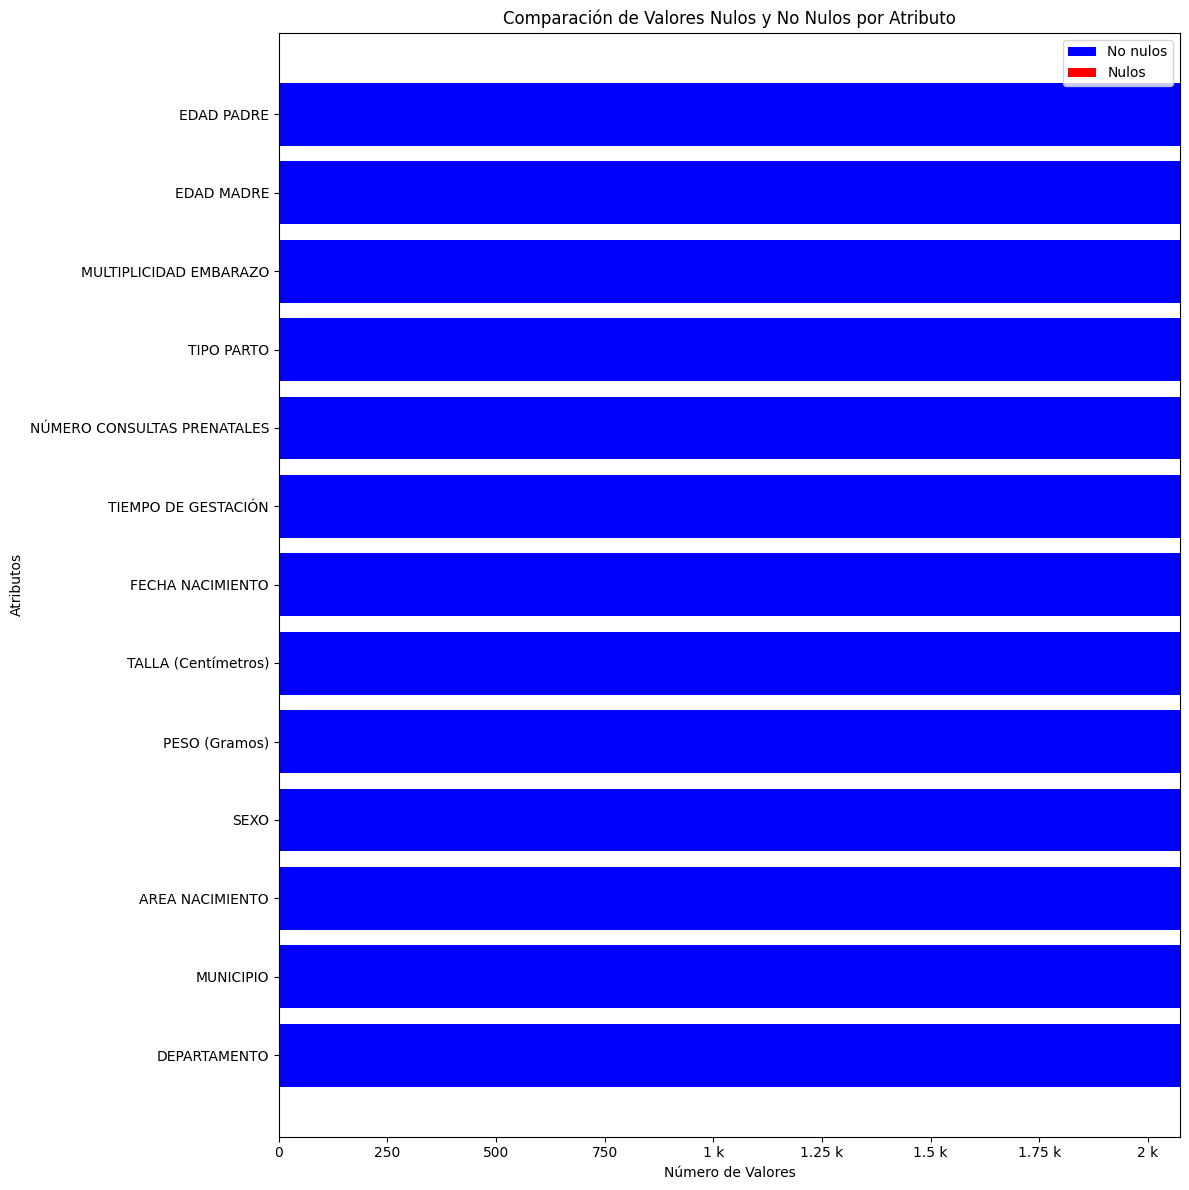

In [ ]:
# Aca obtenemos el nombre de las columnas (Atributos)
columnas = dff.columns

# Aca contamos el numero de datos no nulos que tienen los atributos
NOnulos = dff.count()

# Aca lo mismo que arriba pero con los nulos
nulos = dff.isnull().sum()

# Crear una figura y ejes
plt.figure(figsize=(12, 12))  # Ajusta las dimensiones para más espacio

# Aca se grafican los valores NO nulos
# Aumenta la altura de las barras con el parámetro 'height'
plt.barh(columnas, NOnulos, color='blue', label='No nulos', height=0.8)

# Aca se grafican los valores NULOS
# Aumenta la altura de las barras con el parámetro 'height'
plt.barh(columnas, nulos, left=NOnulos, color='red', label='Nulos', height=0.8)

# Configurar el título y etiquetas del gráfico
plt.title('Comparación de Valores Nulos y No Nulos por Atributo')
plt.xlabel('Número de Valores')
plt.ylabel('Atributos')

# Ajustar formato del eje x para mostrar los números en formato de miles
plt.gca().xaxis.set_major_formatter(ticker.EngFormatter())

plt.xlim(0, 2074 )
# Ajustar la posición de la leyenda para evitar superposición
plt.legend(loc='best')
plt.yticks(rotation=0)

# Mostrar la gráfica
plt.tight_layout()  # Ajusta automáticamente los parámetros de la subtrama para dar espacio a las etiquetas
plt.show()

###**Mapa de correlación entre todas las variables numéricas**

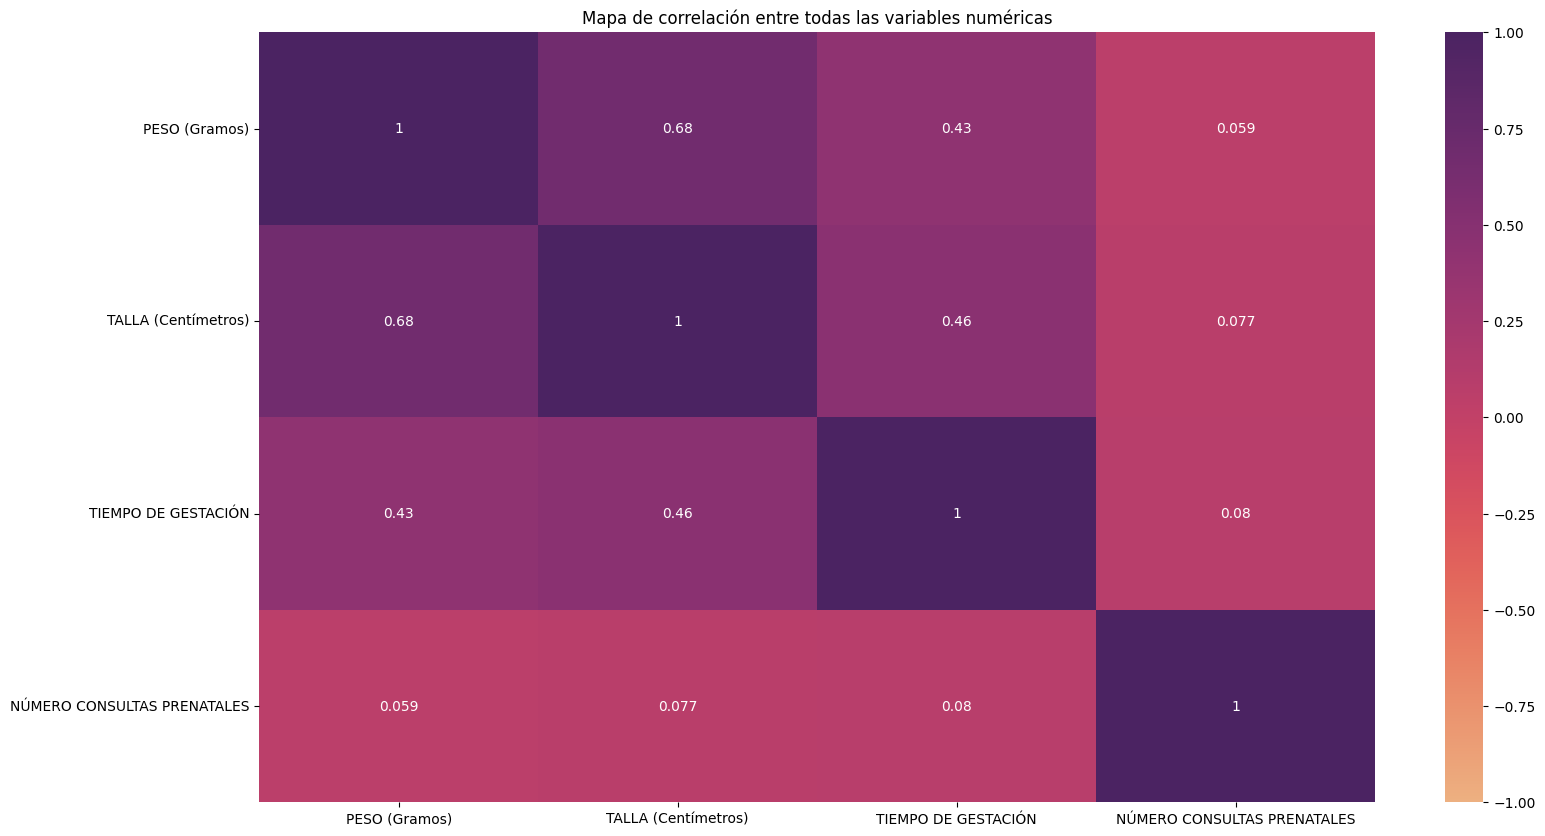

In [ ]:
# Seleccionar solo columnas numéricas
dff_numeric = dff.select_dtypes(include=[np.number])

# Calcular la matriz de correlación de las columnas numéricas
corr_matrix = dff_numeric.corr().fillna(0)  # Rellenar valores NaN con 0


fig, ax = plt.subplots(figsize=(18, 10))
heat_map = sns.heatmap(corr_matrix, vmin=-1, vmax=1, annot=True, cmap="flare")
heat_map.set(title="Mapa de correlación entre todas las variables numéricas")
plt.show()

###**Grafico Distribución del Peso al Nacer en Río Negro**

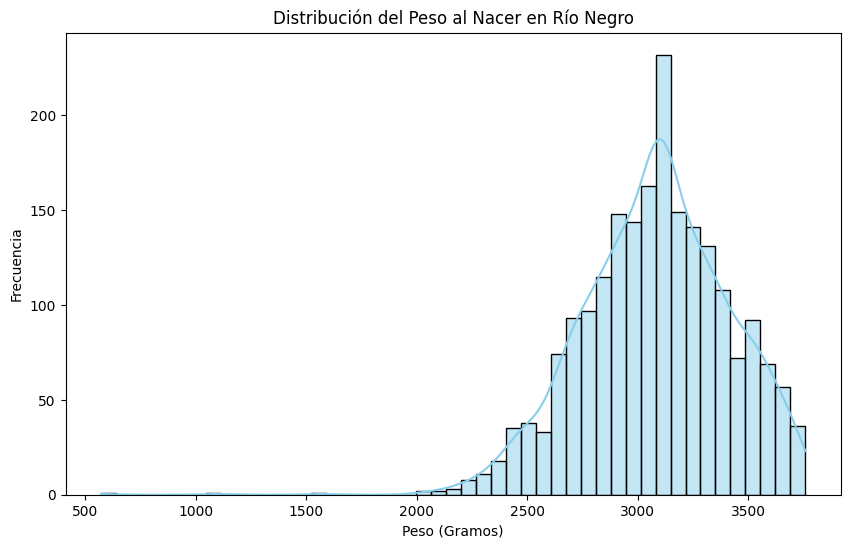

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(dff['PESO (Gramos)'], kde=True, color='skyblue')
plt.title('Distribución del Peso al Nacer en Río Negro')
plt.xlabel('Peso (Gramos)')
plt.ylabel('Frecuencia')
plt.show()


###**Grafico Correlación entre Peso al Nacer y Tiempo de Gestación**

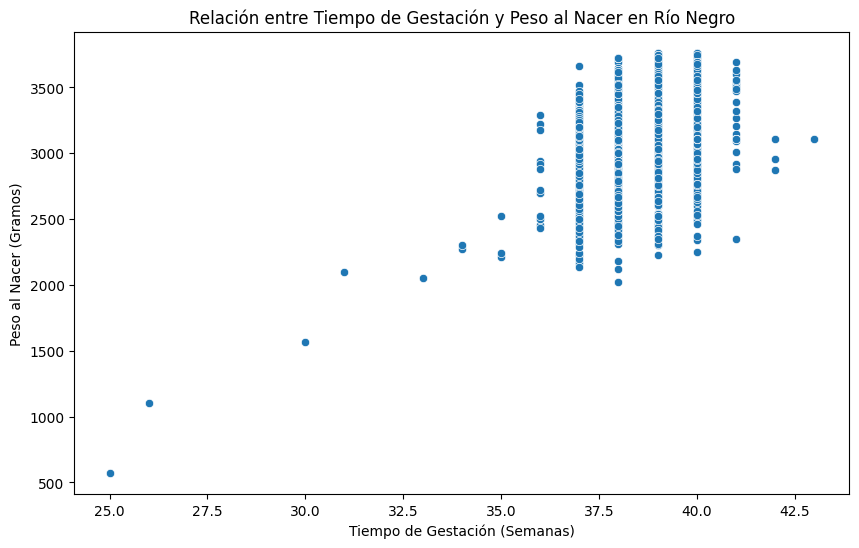

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=dff['TIEMPO DE GESTACIÓN'], y=dff['PESO (Gramos)'])
plt.title('Relación entre Tiempo de Gestación y Peso al Nacer en Río Negro')
plt.xlabel('Tiempo de Gestación (Semanas)')
plt.ylabel('Peso al Nacer (Gramos)')
plt.show()


###**Pairplot con Diferenciación por Sexo**

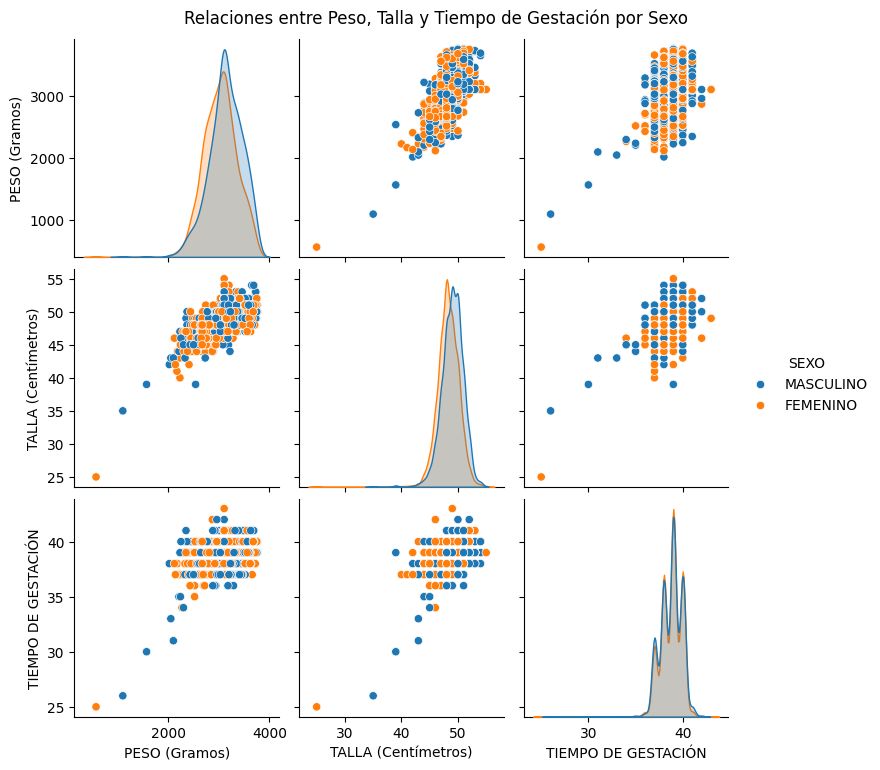

In [ ]:
sns.pairplot(dff, hue='SEXO', vars=['PESO (Gramos)', 'TALLA (Centímetros)', 'TIEMPO DE GESTACIÓN'])
plt.suptitle('Relaciones entre Peso, Talla y Tiempo de Gestación por Sexo', y=1.02)
plt.show()




###**Gráfico de Violín para Comparar Distribuciones**

<ipython-input-28-3032f59bc58a>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(ax=axes[0], x='TIPO PARTO', y='PESO (Gramos)', data=dff, palette='muted')
<ipython-input-28-3032f59bc58a>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(ax=axes[1], x='TIPO PARTO', y='TALLA (Centímetros)', data=dff, palette='muted')


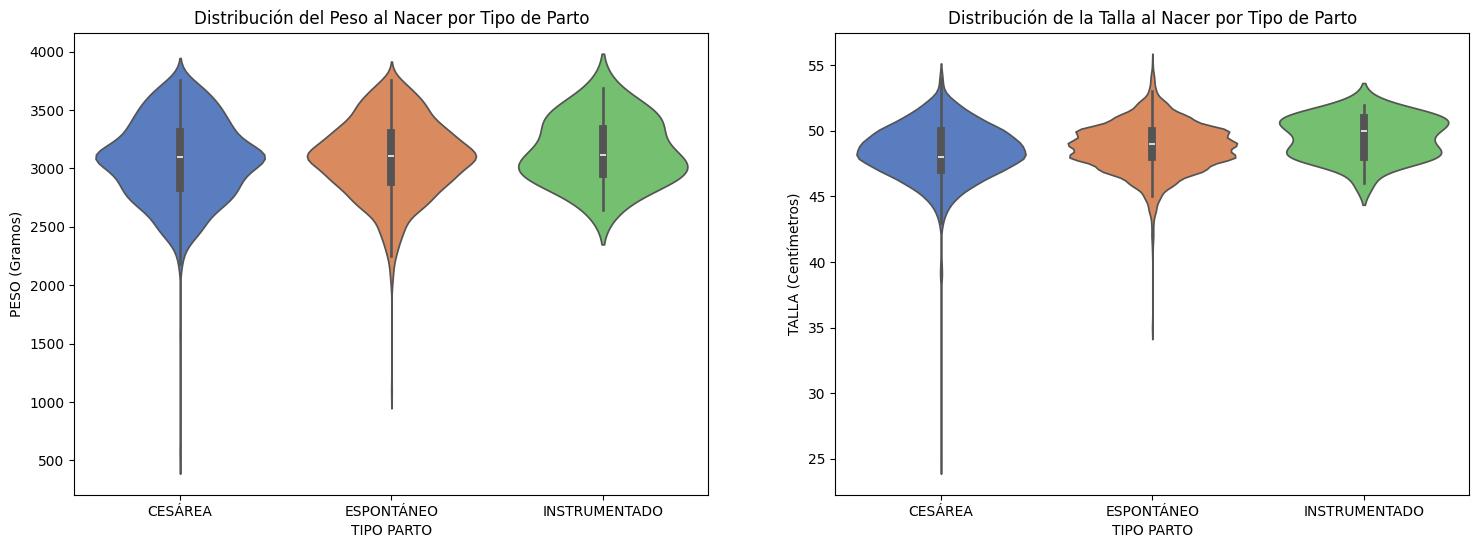

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(18, 6))
sns.violinplot(ax=axes[0], x='TIPO PARTO', y='PESO (Gramos)', data=dff, palette='muted')
axes[0].set_title('Distribución del Peso al Nacer por Tipo de Parto')

sns.violinplot(ax=axes[1], x='TIPO PARTO', y='TALLA (Centímetros)', data=dff, palette='muted')
axes[1].set_title('Distribución de la Talla al Nacer por Tipo de Parto')

plt.show()


#**Dataframe Bucaramanga**

###**Atributos Dataset**
Se hace una breve explicación de cada uno:


- **DEPARTAMENTO**: Departamento que reporta el nacido vivo.
- **MUNICIPIO**: Municipio que reporta el nacido vivo.
- **AREA NACIMIENTO**: Área donde nació la persona: Urbana o Rural.
- **SITIO NACIMIENTO**: Sitio de nacimiento: INSTITUCIÓN DE SALUD, OTRO SITIO O EL DOMICILIO.
- **CODIGO INSTITUCION**: Código de la institución IPS.
- **SEXO**: Características fisiológicas del nacido vivo: MASCULINO, FEMENINO, Sin información.
- **PESO (Gramos)**: Primera medida de peso del recién nacido, tomada preferiblemente dentro de la primera hora de vida.
- **TALLA (Centímetros)**: Estatura del recién nacido, medida desde la planta del pie hasta el vértice de la cabeza.
- **HORA NACIMIENTO**: Hora de nacimiento del nacido vivo.
- **PARTO ATENDIDO POR**: Parto atendido por: MÉDICO, PROMOTOR(A) DE SALUD, ENFERMERO (A), OTRA PERSONA, PARTERA O AUXILIAR DE ENFERMERÍA.
- **TIEMPO DE GESTACIÓN (Semanas)**: Duración del embarazo en semanas.
- **NUMERO CONSULTAS PRENATALES**: Número de consultas prenatales.
- **TIPO PARTO**: Tipo de parto experimentado.
- **MULTIPLICIDAD EMBARAZO**: Multiplicidad del embarazo de la madre.
- **APGAR1**: APGAR1 del nacido vivo.
- **APGAR2**: APGAR2 del nacido vivo.
- **GRUPO SANGUINEO**: Grupo sanguíneo del feto o recién nacido.
- **FACTOR RH**: Factor RH del feto o recién nacido.
- **PERTENENCIA ÉTNICA**: Pertenencia étnica del feto o recién nacido.
- **GRUPO INDIGENA**: Grupo indígena del nacido vivo.
- **EDAD MADRE**: Edad de la madre.
- **ESTADO CONYUGAL MADRE**: Estado conyugal de la madre.
- **NIVEL EDUCATIVO MADRE**: Último nivel educativo alcanzado por la madre.
- **ULTIMO AÑO APROBADO MADRE**: Último año cursado por la madre en su nivel educativo.
- **PAIS RESIDENCIA**: País de residencia del nacido vivo.
- **departamento_residencia**: Departamento de residencia del nacido vivo.
- **MUNICIPIO RESIDENCIA**: Municipio de residencia del nacido vivo.
- **AREA RESIDENCIA**: Área de residencia del nacido vivo.
- **LOCALIDAD**: Localidad del nacido vivo.
- **BARRIO**: Barrio de residencia de la madre gestante.
- **CENTRO POBLADO**: Centro poblado del nacido vivo.
- **RURAL DISPERSO**: Rural disperso del nacido vivo.
- **NÚMERO HIJOS NACIDOS VIVOS**: Número total de hijos nacidos vivos durante las edades reproductivas de la madre.
- **FECHA ANTERIOR HIJO NACIDO VIVO**: Fecha del anterior hijo nacido vivo.
- **NÚMERO EMBARAZOS**: Número de embarazos que ha tenido la madre gestante.
- **RÉGIMEN SEGURIDAD**: Tipo de régimen de seguridad: SUBSIDIADO, CONTRIBUTIVO, NO ASEGURADO, EXCEPCIÓN y ESPECIAL.
- **NOMBRE ADMINISTRADORA**: Nombre de la administradora del nacido vivo.
- **EDAD PADRE**: Edad del padre.
- **NIVEL EDUCATIVO PADRE**: Último nivel educativo alcanzado por el padre.
- **ULTIMO AÑO APROBADO PADRE**: Último año cursado por el padre en su nivel educativo.
- **COMUNA**: Subdivisión administrativa menor, equivalente al municipio o concejo.
- **NOMCOMUNA**: Nombre de la comuna.
- **NUM NOMBCOMUNA**: Número asociado a la comuna.
- **GRUPO EDAD MADRE**: Clasificación de los grupos etarios según el Dane y la OMS para la madre.
- **CURSO DE VIDA MADRE**: Enfoque que aborda los momentos continuos de la vida, reconociendo la interacción de diferentes factores a lo largo del curso de la vida.
- **GRUPO EDAD PADRE**: Clasificación de los grupos etarios según el Dane y la OMS para el padre.
- **CURSO DE VIDA PADRE**: Enfoque que aborda los momentos del continuo de la vida del padre.
- **AÑO**: Año de nacimiento del nacido vivo.
- **BARRIO_VER**: Barrio verificado del nacido vivo.
- **ciudad_geo**: Ciudad georreferenciada del nacido vivo.
- **ORDEN**: Consecutivo autonumérico.
- **DIA SEMANA**: Día de la semana en que nació la persona.
- **MES**: Mes en que nació la persona.

###Carga de los datos

In [ ]:
import pandas as pd

# Ruta al archivo CSV en Google Drive
file_path = "/content/drive/MyDrive/Procesamiento de Datos a Gran Escala/43._Nacidos_Vivos_en_Municipio_de_Bucaramanga_enero_2016_a_febrero_2023_20240513.csv"

# Cargar el archivo CSV en un DataFrame
df = pd.read_csv(file_path)

<ipython-input-29-7147214b85ce>:7: DtypeWarning: Columns (19,33,35,36,38,40,41,42,43,44,45,46,48,49,51,52) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


In [ ]:
df.head()

,DEPARTAMENTO,MUNICIPIO,AREA NACIMIENTO,SITIO NACIMIENTO,CODIGO INSTITUCION,SEXO,PESO (Gramos),TALLA (Centímetros),HORA NACIMIENTO,PARTO ATENDIDO POR,...,GRUPO EDAD MADRE,CURSO DE VIDA MADRE,GRUPO EDAD PADRE,CURSO DE VIDA PADRE,AÑO,BARRIO_VER,ciudad_geo,ORDEN,DIA SEMANA,MES
0,SANTANDER,BUCARAMANGA,CABECERA MUNICIPAL,INSTITUCIÓN DE SALUD,6.800101e+11,FEMENINO,3520.0,53.0,1899-12-31T05:05:00.000,MÉDICO,...,20 a 29,JOVENES,JOVENES,JOVENES,2015.0,GARCIA ROVIRA,Bucaramanga,1.0,04. JUEVES,10. OCTUBRE
1,SANTANDER,BUCARAMANGA,CABECERA MUNICIPAL,INSTITUCIÓN DE SALUD,6.800101e+11,FEMENINO,3180.0,52.0,1899-12-31T02:00:00.000,MÉDICO,...,20 a 29,JOVENES,ADULTEZ,ADULTEZ,2015.0,PEDREGAL,Bucaramanga,2.0,04. JUEVES,10. OCTUBRE
2,SANTANDER,BUCARAMANGA,CABECERA MUNICIPAL,INSTITUCIÓN DE SALUD,6.800101e+11,FEMENINO,3000.0,50.0,1899-12-31T20:55:00.000,MÉDICO,...,20 a 29,JOVENES,JOVENES,JOVENES,2015.0,BUCARAMANGA,Bucaramanga,3.0,03. MIÉRCOLES,10. OCTUBRE
3,SANTANDER,BUCARAMANGA,CABECERA MUNICIPAL,INSTITUCIÓN DE SALUD,6.800101e+11,MASCULINO,3540.0,55.0,1899-12-31T16:19:00.000,MÉDICO,...,20 a 29,ADULTEZ,ADULTEZ,ADULTEZ,2015.0,CENTRO,Bucaramanga,4.0,02. MARTES,10. OCTUBRE
4,SANTANDER,BUCARAMANGA,CABECERA MUNICIPAL,INSTITUCIÓN DE SALUD,6.800101e+11,FEMENINO,3430.0,53.0,1899-12-31T12:22:00.000,MÉDICO,...,30 a 39,ADULTEZ,ADULTEZ,ADULTEZ,2015.0,LA FERIA,Bucaramanga,5.0,04. JUEVES,10. OCTUBRE


###**Información de los atributos**


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65577 entries, 0 to 65576
Data columns (total 53 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   DEPARTAMENTO                     65577 non-null  object 
 1   MUNICIPIO                        65577 non-null  object 
 2   AREA NACIMIENTO                  65577 non-null  object 
 3   SITIO NACIMIENTO                 65575 non-null  object 
 4   CODIGO INSTITUCION               65549 non-null  float64
 5   SEXO                             65575 non-null  object 
 6   PESO (Gramos)                    65570 non-null  float64
 7   TALLA (Centímetros)              65570 non-null  float64
 8   HORA NACIMIENTO                  65574 non-null  object 
 9   PARTO ATENDIDO POR               65575 non-null  object 
 10  TIEMPO DE GESTACIÓN (Semanas)    65567 non-null  float64
 11  NUMERO CONSULTAS PRENATALES      65567 non-null  float64
 12  TIPO PARTO        

# **LIMPIEZA**


## Verificar si hay valores faltantes

In [ ]:
# Verificar valores faltantes por columna
missing_values = df.isnull().sum()
print("Valores faltantes por columna:")
print(missing_values)


Valores faltantes por columna:
DEPARTAMENTO                           0
MUNICIPIO                              0
AREA NACIMIENTO                        0
SITIO NACIMIENTO                       2
CODIGO INSTITUCION                    28
SEXO                                   2
PESO (Gramos)                          7
TALLA (Centímetros)                    7
HORA NACIMIENTO                        3
PARTO ATENDIDO POR                     2
TIEMPO DE GESTACIÓN (Semanas)         10
NUMERO CONSULTAS PRENATALES           10
TIPO PARTO                             2
MULTIPLICIDAD EMBARAZO                 2
APGAR1                                73
APGAR2                                73
GRUPO SANGUINEO                      147
FACTOR RH                            147
PERTENENCIA ÉTNICA                     2
GRUPO INDIGENA                     65557
EDAD MADRE                           228
ESTADO CONYUGAL MADRE                228
NIVEL EDUCATIVO MADRE                386
ULTIMO AÑO APROBADO MADRE 

## Imputacion de datos

In [ ]:
# Definir las columnas donde se imputarán valores faltantes
columnas_numericas = ['PESO (Gramos)', 'TALLA (Centímetros)', 'TIEMPO DE GESTACIÓN (Semanas)',
                      'NUMERO CONSULTAS PRENATALES', 'APGAR1', 'APGAR2', 'EDAD MADRE',
                      'ULTIMO AÑO APROBADO MADRE', 'EDAD PADRE', 'ULTIMO AÑO APROBADO PADRE']

columnas_categoricas = ['SITIO NACIMIENTO', 'PARTO ATENDIDO POR', 'TIPO PARTO',
                        'MULTIPLICIDAD EMBARAZO', 'PERTENENCIA ÉTNICA', 'GRUPO SANGUINEO',
                        'FACTOR RH', 'ESTADO CONYUGAL MADRE', 'NIVEL EDUCATIVO MADRE',
                        'PAIS RESIDENCIA', 'departamento_residencia', 'MUNICIPIO RESIDENCIA',
                        'AREA RESIDENCIA', 'LOCALIDAD', 'BARRIO', 'RURAL DISPERSO',
                        'RÉGIMEN SEGURIDAD', 'NOMBRE ADMINISTRADORA', 'NIVEL EDUCATIVO PADRE',
                        'COMUNA', 'NOMCOMUNA', 'NUM NOMBCOMUNA', 'GRUPO EDAD MADRE',
                        'CURSO DE VIDA MADRE', 'GRUPO EDAD PADRE', 'CURSO DE VIDA PADRE',
                        'BARRIO_VER', 'ciudad_geo', 'DIA SEMANA', 'MES']

# Imputar valores faltantes en columnas numéricas con la mediana
for columna in columnas_numericas:
    df[columna].fillna(df[columna].median(), inplace=True)

# Imputar valores faltantes en columnas categóricas con la moda
for columna in columnas_categoricas:
    moda = df[columna].mode()[0]
    df[columna].fillna(moda, inplace=True)

# Mostrar información sobre los valores faltantes después de la imputación
print("Valores faltantes por columna después de la imputación:")
print(df.isnull().sum())


Valores faltantes por columna después de la imputación:
DEPARTAMENTO                           0
MUNICIPIO                              0
AREA NACIMIENTO                        0
SITIO NACIMIENTO                       0
CODIGO INSTITUCION                    28
SEXO                                   2
PESO (Gramos)                          0
TALLA (Centímetros)                    0
HORA NACIMIENTO                        3
PARTO ATENDIDO POR                     0
TIEMPO DE GESTACIÓN (Semanas)          0
NUMERO CONSULTAS PRENATALES            0
TIPO PARTO                             0
MULTIPLICIDAD EMBARAZO                 0
APGAR1                                 0
APGAR2                                 0
GRUPO SANGUINEO                        0
FACTOR RH                              0
PERTENENCIA ÉTNICA                     0
GRUPO INDIGENA                     65557
EDAD MADRE                             0
ESTADO CONYUGAL MADRE                  0
NIVEL EDUCATIVO MADRE                  0
U

## Eliminación de columnas con muchos valores faltantes

In [ ]:
# Eliminar columnas con más del 90% de valores faltantes
umbral = len(df) * 0.9
df.dropna(thresh=umbral, axis=1, inplace=True)

# Mostrar las columnas restantes
print("Columnas restantes después de eliminar aquellas con muchos valores faltantes:")
print(df.columns)

#  Mostrar información sobre los valores faltantes
print("Valores faltantes por columna:")
print(df.isnull().sum())



Columnas restantes después de eliminar aquellas con muchos valores faltantes:
Index(['DEPARTAMENTO', 'MUNICIPIO', 'AREA NACIMIENTO', 'SITIO NACIMIENTO',
       'CODIGO INSTITUCION', 'SEXO', 'PESO (Gramos)', 'TALLA (Centímetros)',
       'HORA NACIMIENTO', 'PARTO ATENDIDO POR',
       'TIEMPO DE GESTACIÓN (Semanas)', 'NUMERO CONSULTAS PRENATALES',
       'TIPO PARTO', 'MULTIPLICIDAD EMBARAZO', 'APGAR1', 'APGAR2',
       'GRUPO SANGUINEO', 'FACTOR RH', 'PERTENENCIA ÉTNICA', 'EDAD MADRE',
       'ESTADO CONYUGAL MADRE', 'NIVEL EDUCATIVO MADRE',
       'ULTIMO AÑO APROBADO MADRE', 'PAIS RESIDENCIA',
       'departamento_residencia', 'MUNICIPIO RESIDENCIA', 'AREA RESIDENCIA',
       'LOCALIDAD', 'BARRIO', 'RURAL DISPERSO', 'NÚMERO HIJOS NACIDOS VIVOS',
       'NÚMERO EMBARAZOS', 'RÉGIMEN SEGURIDAD', 'NOMBRE ADMINISTRADORA',
       'EDAD PADRE', 'NIVEL EDUCATIVO PADRE', 'ULTIMO AÑO APROBADO PADRE',
       'COMUNA', 'NOMCOMUNA', 'NUM NOMBCOMUNA', 'GRUPO EDAD MADRE',
       'CURSO DE VIDA MADR

## Imputacion de valores numericos y categoricos restantes

In [ ]:
from sklearn.impute import SimpleImputer

# Definir las columnas donde se imputarán valores faltantes
columns_numeric = ['CODIGO INSTITUCION', 'PESO (Gramos)', 'TALLA (Centímetros)',
                   'TIEMPO DE GESTACIÓN (Semanas)', 'NUMERO CONSULTAS PRENATALES',
                   'APGAR1', 'APGAR2', 'EDAD MADRE', 'ULTIMO AÑO APROBADO MADRE',
                   'EDAD PADRE', 'ULTIMO AÑO APROBADO PADRE', 'NÚMERO HIJOS NACIDOS VIVOS',
                   'NÚMERO EMBARAZOS', 'AÑO']

columns_categorical = ['SEXO', 'HORA NACIMIENTO', 'PARTO ATENDIDO POR',
                        'TIPO PARTO', 'MULTIPLICIDAD EMBARAZO', 'GRUPO SANGUINEO',
                        'FACTOR RH', 'PERTENENCIA ÉTNICA', 'ESTADO CONYUGAL MADRE',
                        'NIVEL EDUCATIVO MADRE', 'PAIS RESIDENCIA',
                        'departamento_residencia', 'MUNICIPIO RESIDENCIA',
                        'AREA RESIDENCIA', 'LOCALIDAD', 'BARRIO', 'RURAL DISPERSO',
                        'RÉGIMEN SEGURIDAD', 'NOMBRE ADMINISTRADORA', 'COMUNA',
                        'NOMCOMUNA', 'NUM NOMBCOMUNA', 'GRUPO EDAD MADRE',
                        'CURSO DE VIDA MADRE', 'GRUPO EDAD PADRE',
                        'CURSO DE VIDA PADRE', 'BARRIO_VER', 'ciudad_geo',
                        'DIA SEMANA', 'MES']

# Crear el imputador para valores numéricos
imputer_numeric = SimpleImputer(strategy='median')

# Imputar valores numéricos
df[columns_numeric] = imputer_numeric.fit_transform(df[columns_numeric])

# Crear el imputador para valores categóricos
imputer_categorical = SimpleImputer(strategy='most_frequent')

# Imputar valores categóricos
df[columns_categorical] = imputer_categorical.fit_transform(df[columns_categorical])

# Verificar que no hay valores faltantes después de la imputación
print("Valores faltantes por columna después de la imputación:")
print(df.isnull().sum())


Valores faltantes por columna después de la imputación:
DEPARTAMENTO                     0
MUNICIPIO                        0
AREA NACIMIENTO                  0
SITIO NACIMIENTO                 0
CODIGO INSTITUCION               0
SEXO                             0
PESO (Gramos)                    0
TALLA (Centímetros)              0
HORA NACIMIENTO                  0
PARTO ATENDIDO POR               0
TIEMPO DE GESTACIÓN (Semanas)    0
NUMERO CONSULTAS PRENATALES      0
TIPO PARTO                       0
MULTIPLICIDAD EMBARAZO           0
APGAR1                           0
APGAR2                           0
GRUPO SANGUINEO                  0
FACTOR RH                        0
PERTENENCIA ÉTNICA               0
EDAD MADRE                       0
ESTADO CONYUGAL MADRE            0
NIVEL EDUCATIVO MADRE            0
ULTIMO AÑO APROBADO MADRE        0
PAIS RESIDENCIA                  0
departamento_residencia          0
MUNICIPIO RESIDENCIA             0
AREA RESIDENCIA                  0

## Detección de valores atípicos

In [ ]:
print("Estadísticas descriptivas:")
print(df.describe)

Estadísticas descriptivas:
<bound method NDFrame.describe of       DEPARTAMENTO    MUNICIPIO     AREA NACIMIENTO      SITIO NACIMIENTO  \
0        SANTANDER  BUCARAMANGA  CABECERA MUNICIPAL  INSTITUCIÓN DE SALUD   
1        SANTANDER  BUCARAMANGA  CABECERA MUNICIPAL  INSTITUCIÓN DE SALUD   
2        SANTANDER  BUCARAMANGA  CABECERA MUNICIPAL  INSTITUCIÓN DE SALUD   
3        SANTANDER  BUCARAMANGA  CABECERA MUNICIPAL  INSTITUCIÓN DE SALUD   
4        SANTANDER  BUCARAMANGA  CABECERA MUNICIPAL  INSTITUCIÓN DE SALUD   
...            ...          ...                 ...                   ...   
65572    SANTANDER  BUCARAMANGA  CABECERA MUNICIPAL  INSTITUCIÓN DE SALUD   
65573    SANTANDER  BUCARAMANGA  CABECERA MUNICIPAL  INSTITUCIÓN DE SALUD   
65574    SANTANDER  BUCARAMANGA  CABECERA MUNICIPAL  INSTITUCIÓN DE SALUD   
65575    SANTANDER  BUCARAMANGA  CABECERA MUNICIPAL  INSTITUCIÓN DE SALUD   
65576    SANTANDER  BUCARAMANGA  CABECERA MUNICIPAL  INSTITUCIÓN DE SALUD   

       CODIGO 

In [ ]:
# Seleccionar solo las columnas numéricas
numeric_columns = df.select_dtypes(include=['int64', 'float64'])

# Calcular los percentiles 25 y 75
Q1 = numeric_columns.quantile(0.25)
Q3 = numeric_columns.quantile(0.75)

# Calcular el rango intercuartil (IQR)
IQR = Q3 - Q1

# Definir los límites para detectar valores atípicos
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Detectar valores atípicos
outliers = (numeric_columns < lower_bound) | (numeric_columns > upper_bound)

# Contar valores atípicos por columna
outliers_count = outliers.sum()

# Mostrar valores atípicos por columna
print("Valores atípicos por columna:")
print(outliers_count)


Valores atípicos por columna:
CODIGO INSTITUCION               13174
PESO (Gramos)                     2076
TALLA (Centímetros)               2673
TIEMPO DE GESTACIÓN (Semanas)     8582
NUMERO CONSULTAS PRENATALES       1693
APGAR1                           14259
APGAR2                             815
EDAD MADRE                          99
ULTIMO AÑO APROBADO MADRE            0
NÚMERO HIJOS NACIDOS VIVOS        3399
NÚMERO EMBARAZOS                  5970
EDAD PADRE                        1385
ULTIMO AÑO APROBADO PADRE            0
AÑO                                  0
dtype: int64


###**Atributos duplicado dataset**

In [ ]:
#Se identifican los duplicados totales del dataframe
df.duplicated().sum()

1

#**Gráficas y tablas del dataset**

###**Binarizacion de algunos atributos**

In [ ]:
# Binarizar 'SEXO': 1 si es "Femenino", 0 si es "Masculino"
df['SEXO'] = df['SEXO'].map({'Femenino': 1, 'Masculino': 0})

# Binarizar 'AREA NACIMIENTO': 1 si es "Urbano", 0 si es "Rural"
df['AREA NACIMIENTO'] = df['AREA NACIMIENTO'].map({'Urbano': 1, 'Rural': 0})

# Binarizar 'AREA RESIDENCIA' si contiene valores similares a "AREA NACIMIENTO"
df['AREA RESIDENCIA'] = df['AREA RESIDENCIA'].map({'Urbano': 1, 'Rural': 0})

# Si 'FACTOR RH' tiene valores como Positivo/Negativo
df['FACTOR RH'] = df['FACTOR RH'].map({'+': 1, '-': 0})

# vERIFICA SI SE BINARIZO
print(df[['SEXO', 'AREA NACIMIENTO', 'AREA RESIDENCIA', 'FACTOR RH']].head())




   SEXO  AREA NACIMIENTO  AREA RESIDENCIA  FACTOR RH
0   NaN              NaN              NaN        NaN
1   NaN              NaN              NaN        NaN
2   NaN              NaN              NaN        NaN
3   NaN              NaN              NaN        NaN
4   NaN              NaN              NaN        NaN


###**Mapa de correlación entre todas las variables numéricas**

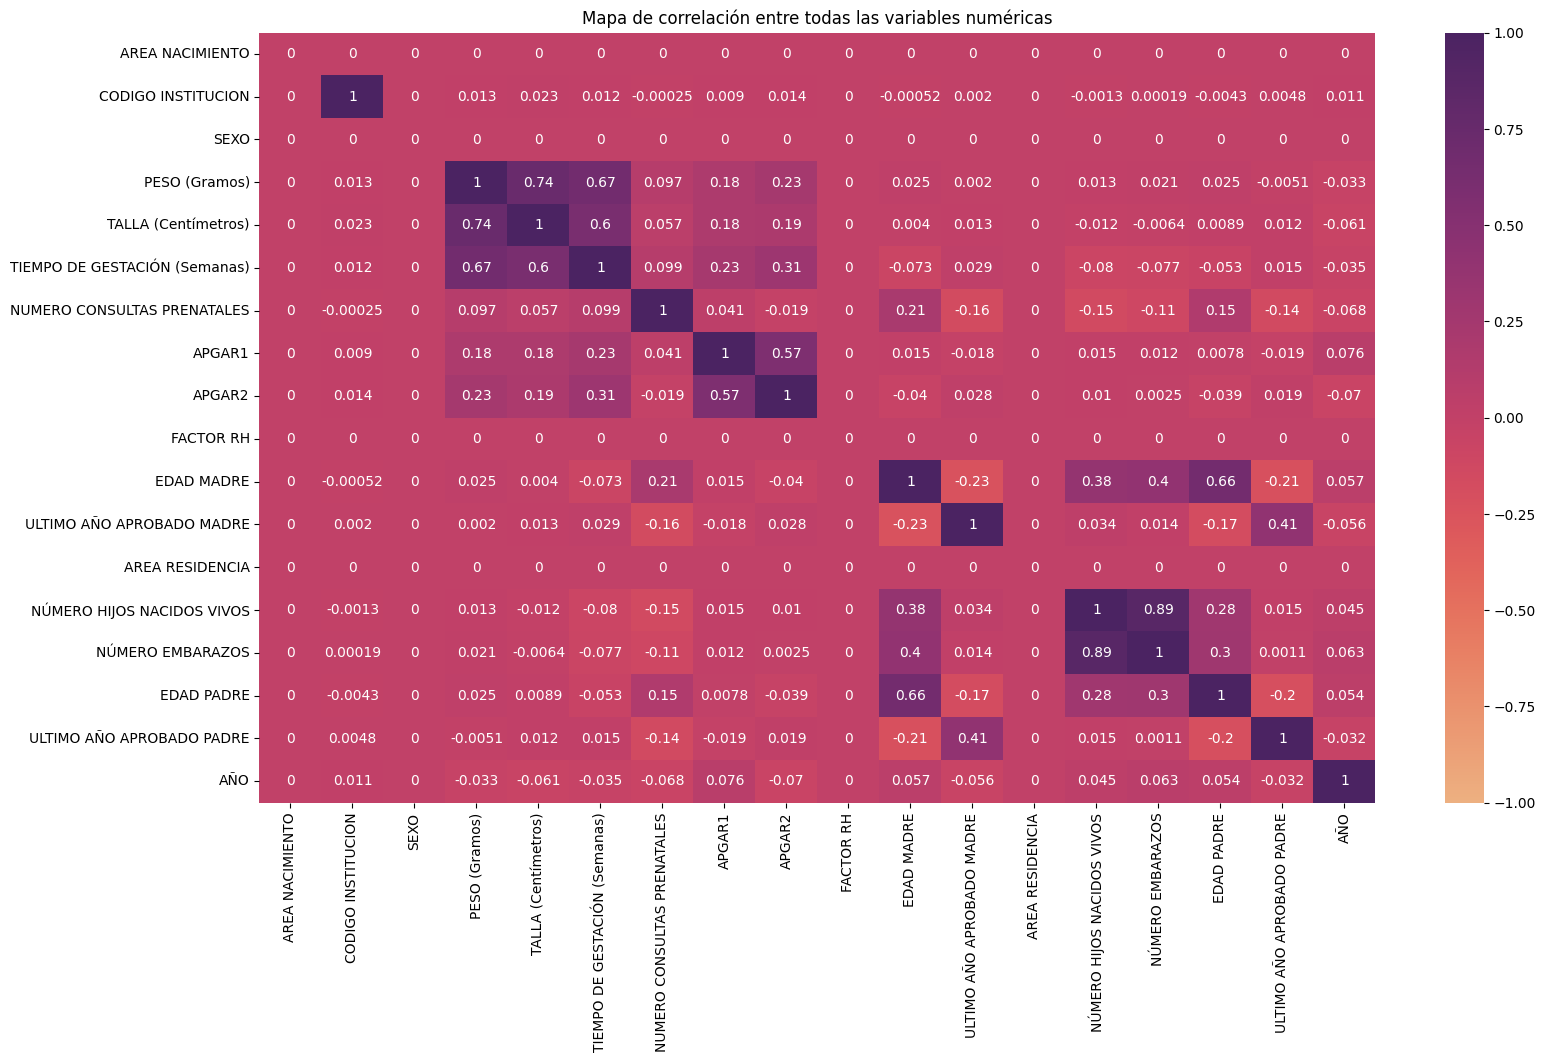

In [ ]:
# Seleccionar solo columnas numéricas
df_numeric = df.select_dtypes(include=[np.number])

# Calcular la matriz de correlación de las columnas numéricas
corr_matrix = df_numeric.corr().fillna(0)  # Rellenar valores NaN con 0

# Crear el mapa de calor
fig, ax = plt.subplots(figsize=(18, 10))
heat_map = sns.heatmap(corr_matrix, vmin=-1, vmax=1, annot=True, cmap="flare")
heat_map.set(title="Mapa de correlación entre todas las variables numéricas")
plt.show()


###**Grafica nulos y no nulos en los atributos**

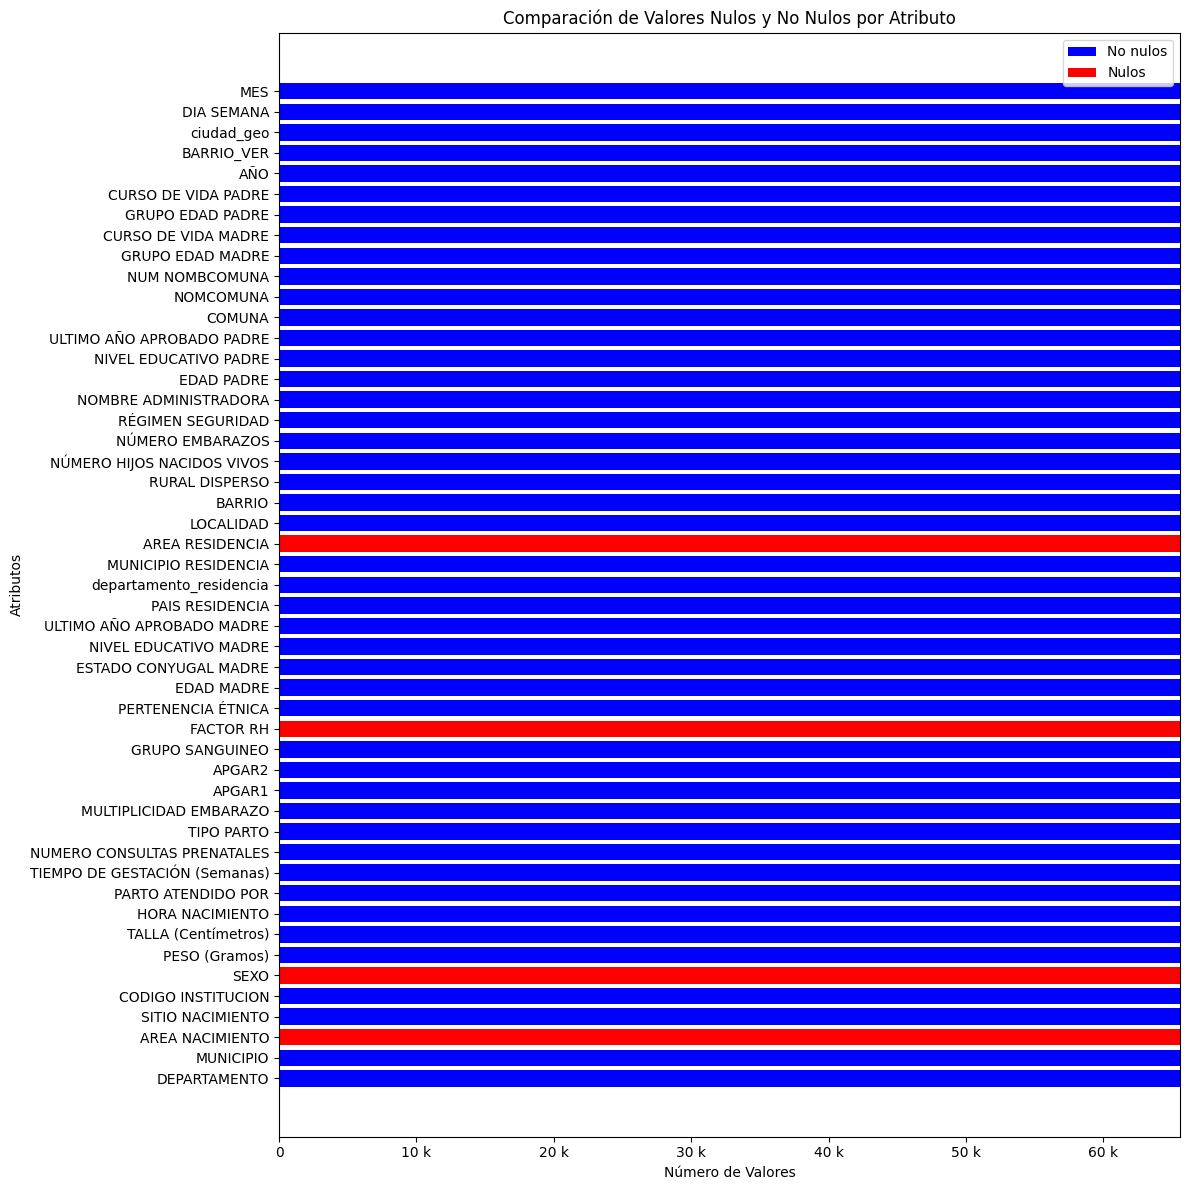

In [ ]:
# Aca obtenemos el nombre de las columnas (Atributos)
columnas = df.columns

# Aca contamos el numero de datos no nulos que tienen los atributos
NOnulos = df.count()

# Aca lo mismo que arriba pero con los nulos
nulos = df.isnull().sum()

# Crear una figura y ejes
plt.figure(figsize=(12, 12))  # Ajusta las dimensiones para más espacio

# Aca se grafican los valores NO nulos
# Aumenta la altura de las barras con el parámetro 'height'
plt.barh(columnas, NOnulos, color='blue', label='No nulos', height=0.8)

# Aca se grafican los valores NULOS
# Aumenta la altura de las barras con el parámetro 'height'
plt.barh(columnas, nulos, left=NOnulos, color='red', label='Nulos', height=0.8)

# Configurar el título y etiquetas del gráfico
plt.title('Comparación de Valores Nulos y No Nulos por Atributo')
plt.xlabel('Número de Valores')
plt.ylabel('Atributos')

# Ajustar formato del eje x para mostrar los números en formato de miles
plt.gca().xaxis.set_major_formatter(ticker.EngFormatter())

plt.xlim(0, 65577 )
# Ajustar la posición de la leyenda para evitar superposición
plt.legend(loc='best')
plt.yticks(rotation=0)

# Mostrar la gráfica
plt.tight_layout()  # Ajusta automáticamente los parámetros de la subtrama para dar espacio a las etiquetas
plt.show()


###**Graficas para entendimiento mejor de los datos**

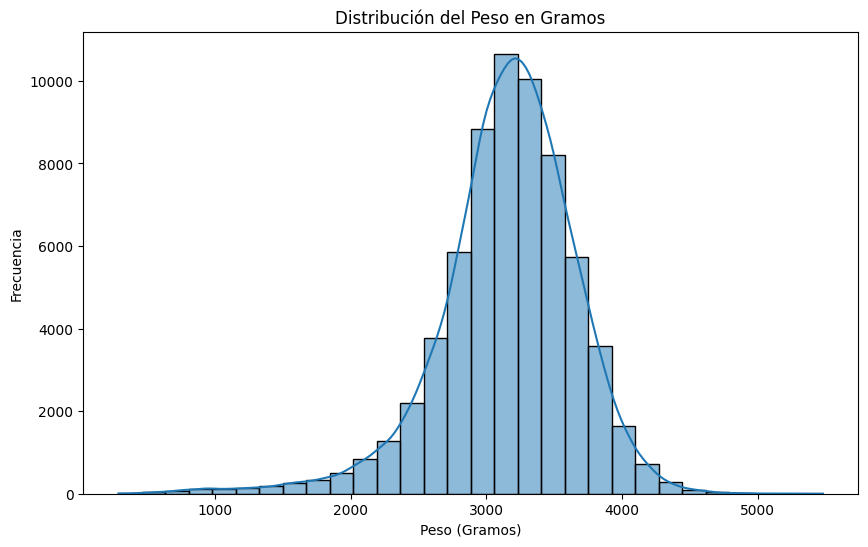

In [ ]:
# Histograma de Peso en Gramos
plt.figure(figsize=(10, 6))
sns.histplot(df['PESO (Gramos)'].dropna(), kde=True, bins=30)
plt.title('Distribución del Peso en Gramos')
plt.xlabel('Peso (Gramos)')
plt.ylabel('Frecuencia')
plt.show()


###**Gráfica de Sexo por Grupo Sanguíneo**

In [ ]:
#Cruzar dataframe
cross_tab = pd.crosstab(df['SEXO'], df['GRUPO SANGUINEO'])

# Graficando
cross_tab.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Distribución de Sexo por Grupo Sanguíneo')
plt.xlabel('Sexo')
plt.ylabel('Frecuencia')
plt.show()



TypeError: no numeric data to plot

###**Pairplot de algunos atributos relacionados**

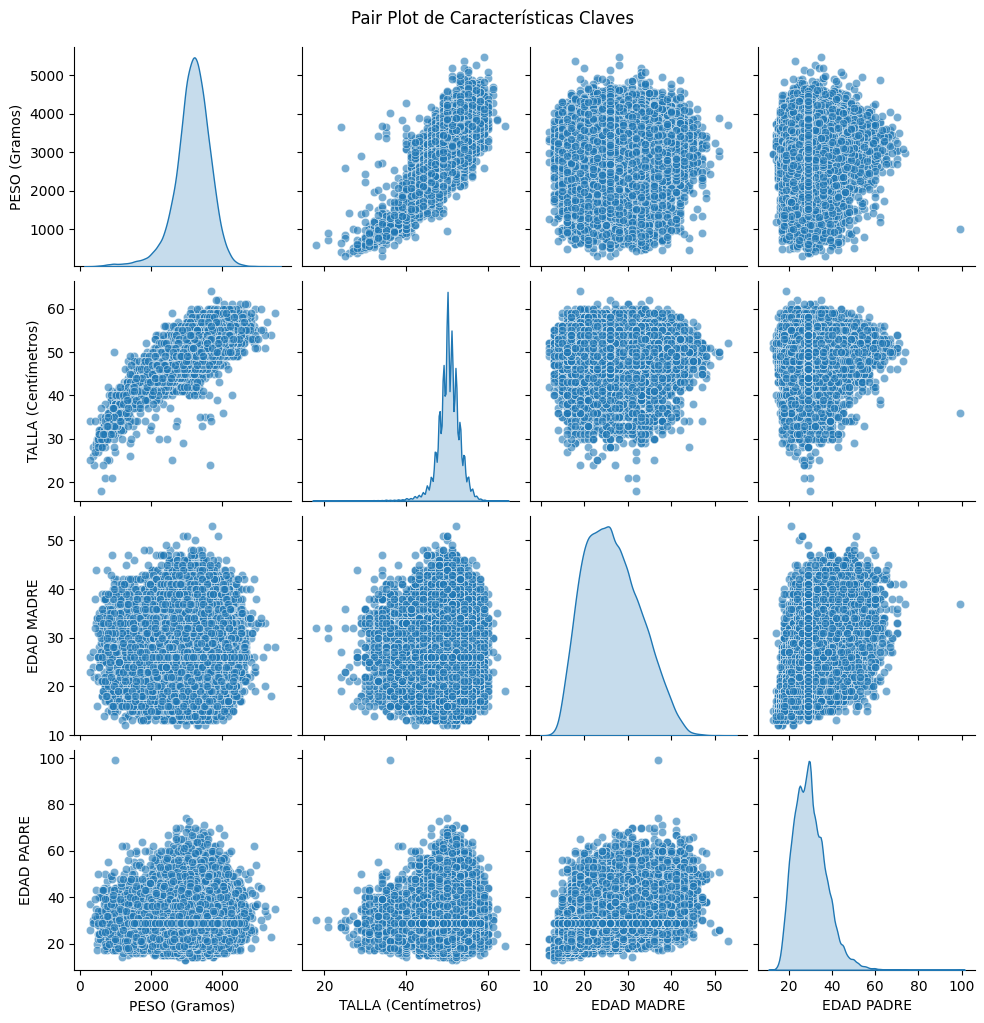

In [ ]:
sns.pairplot(df[['PESO (Gramos)', 'TALLA (Centímetros)', 'EDAD MADRE', 'EDAD PADRE']], diag_kind='kde', plot_kws={'alpha': 0.6})
plt.suptitle('Pair Plot de Características Claves', y=1.02)
plt.show()


###**Gráfica de Edades de Padres y Madres**

<ipython-input-46-e379eeb5e839>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['EDAD MADRE'], shade=True, color="r", label="Madres")
<ipython-input-46-e379eeb5e839>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['EDAD PADRE'], shade=True, color="b", label="Padres")


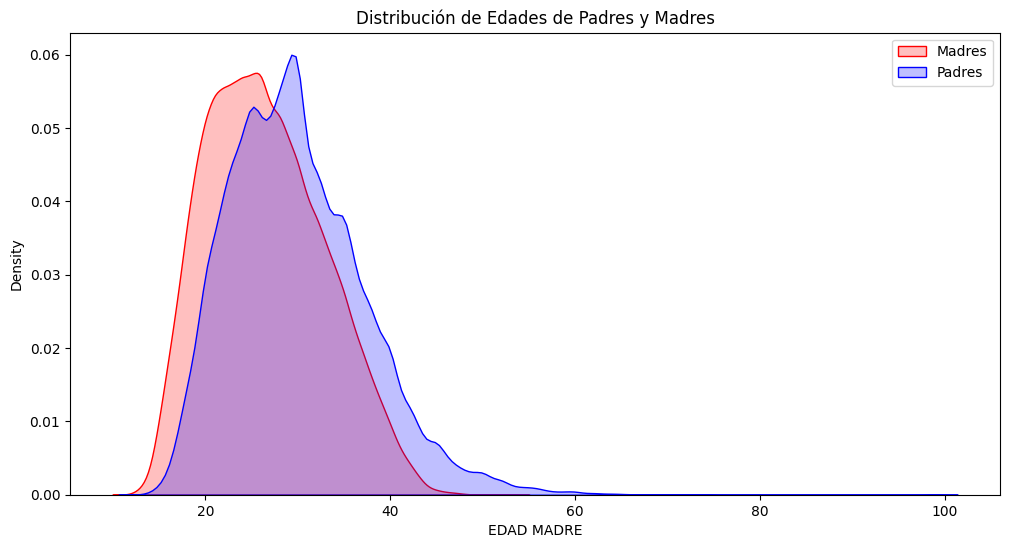

In [ ]:
plt.figure(figsize=(12, 6))
sns.kdeplot(df['EDAD MADRE'], shade=True, color="r", label="Madres")
sns.kdeplot(df['EDAD PADRE'], shade=True, color="b", label="Padres")
plt.title('Distribución de Edades de Padres y Madres')
plt.legend()
plt.show()


###**Gráfica de Nacimientos por Sexo y Mes**

In [ ]:
# Preparación de datos
data = pd.crosstab(df['MES'], df['SEXO'])

# Gráfico de área apilado
data.plot(kind='area', stacked=True, figsize=(12, 6))
plt.title('Distribución de Nacimientos por Sexo y Mes')
plt.xlabel('Mes')
plt.ylabel('Número de Nacimientos')
plt.show()


TypeError: no numeric data to plot

#**UNION DATASETS**

Observar que columnas son iguales:

In [ ]:
df.columns

In [ ]:
dff.columns

In [ ]:
# Renombrar las columnas en df para que coincidan con los nombres en dff
df_renamed = df.rename(columns={
    'TIEMPO DE GESTACIÓN (Semanas)': 'TIEMPO DE GESTACIÓN',
    'NUMERO CONSULTAS PRENATALES': 'NÚMERO CONSULTAS PRENATALES'
})

# Definir las columnas comunes a ambos DataFrames
columns_common = [
    'DEPARTAMENTO', 'MUNICIPIO', 'AREA NACIMIENTO', 'SEXO', 'PESO (Gramos)',
    'TALLA (Centímetros)', 'TIEMPO DE GESTACIÓN', 'NÚMERO CONSULTAS PRENATALES',
    'TIPO PARTO', 'MULTIPLICIDAD EMBARAZO', 'EDAD MADRE', 'EDAD PADRE'
]

# Seleccionar solo las columnas comunes en ambos DataFrames
df_final1 = df_renamed[columns_common]
dff_final1 = dff[columns_common]

# Concatenar los DataFrames
newdf = pd.concat([df_final1, dff_final1], ignore_index=True)

# Verificar los resultados
print("Dimensiones del DataFrame final:", newdf.shape)
print(newdf.head())



Dimensiones del DataFrame final: (67651, 12)
  DEPARTAMENTO    MUNICIPIO AREA NACIMIENTO SEXO  PESO (Gramos)  \
0    SANTANDER  BUCARAMANGA             NaN  NaN         3520.0   
1    SANTANDER  BUCARAMANGA             NaN  NaN         3180.0   
2    SANTANDER  BUCARAMANGA             NaN  NaN         3000.0   
3    SANTANDER  BUCARAMANGA             NaN  NaN         3540.0   
4    SANTANDER  BUCARAMANGA             NaN  NaN         3430.0   

   TALLA (Centímetros)  TIEMPO DE GESTACIÓN  NÚMERO CONSULTAS PRENATALES  \
0                 53.0                 40.0                         12.0   
1                 52.0                 39.0                         11.0   
2                 50.0                 38.0                         10.0   
3                 55.0                 38.0                         10.0   
4                 53.0                 39.0                          6.0   

   TIPO PARTO MULTIPLICIDAD EMBARAZO EDAD MADRE EDAD PADRE  
0  ESPONTÁNEO                 SIMP

El dataframe concatenado queda nombrado como **"newdf"**

###**Verificación calidad de datos de nuevo dataframe:**

In [ ]:
# Verificar valores nulos
print("Valores nulos por columna:")
print(newdf.isnull().sum())

# Revisar los tipos de datos de las columnas
print("Tipos de datos de las columnas:")
print(newdf.dtypes)

# Estadísticas descriptivas para las columnas numéricas
print("Estadísticas descriptivas:")
print(newdf.describe())


Valores nulos por columna:
DEPARTAMENTO                       0
MUNICIPIO                          0
AREA NACIMIENTO                65577
SEXO                           65577
PESO (Gramos)                      0
TALLA (Centímetros)                0
TIEMPO DE GESTACIÓN                0
NÚMERO CONSULTAS PRENATALES        0
TIPO PARTO                         0
MULTIPLICIDAD EMBARAZO             0
EDAD MADRE                         0
EDAD PADRE                         0
dtype: int64
Tipos de datos de las columnas:
DEPARTAMENTO                    object
MUNICIPIO                       object
AREA NACIMIENTO                 object
SEXO                            object
PESO (Gramos)                  float64
TALLA (Centímetros)            float64
TIEMPO DE GESTACIÓN            float64
NÚMERO CONSULTAS PRENATALES    float64
TIPO PARTO                      object
MULTIPLICIDAD EMBARAZO          object
EDAD MADRE                      object
EDAD PADRE                      object
dtype: object
Es

###**Mejoramiento del dataset:**

In [ ]:
# Función para limpiar datos numéricos
def clean_numeric(x):
    try:
        # Intenta convertir directamente a float
        return float(x)
    except:
        # Si falla, intenta eliminar caracteres no numéricos y convierte
        try:
            return float(''.join(filter(str.isdigit, x)))
        except:
            # Si aún falla, retorna NaN para que pueda ser imputado luego
            return np.nan

# Aplicar la función de limpieza a las columnas numéricas problemáticas
newdf['EDAD MADRE'] = newdf['EDAD MADRE'].apply(clean_numeric)
newdf['EDAD PADRE'] = newdf['EDAD PADRE'].apply(clean_numeric)
newdf['PESO (Gramos)'] = newdf['PESO (Gramos)'].apply(clean_numeric)
newdf['TALLA (Centímetros)'] = newdf['TALLA (Centímetros)'].apply(clean_numeric)
newdf['TIEMPO DE GESTACIÓN'] = newdf['TIEMPO DE GESTACIÓN'].apply(clean_numeric)
newdf['NÚMERO CONSULTAS PRENATALES'] = newdf['NÚMERO CONSULTAS PRENATALES'].apply(clean_numeric)

# Imputar los valores nulos con la mediana después de limpiar
newdf['PESO (Gramos)'].fillna(newdf['PESO (Gramos)'].median(), inplace=True)
newdf['TALLA (Centímetros)'].fillna(newdf['TALLA (Centímetros)'].median(), inplace=True)
newdf['TIEMPO DE GESTACIÓN'].fillna(newdf['TIEMPO DE GESTACIÓN'].median(), inplace=True)
newdf['NÚMERO CONSULTAS PRENATALES'].fillna(newdf['NÚMERO CONSULTAS PRENATALES'].median(), inplace=True)
newdf['EDAD MADRE'].fillna(newdf['EDAD MADRE'].median(), inplace=True)
newdf['EDAD PADRE'].fillna(newdf['EDAD PADRE'].median(), inplace=True)

# Revisar de nuevo los tipos de datos y los valores nulos

print("\nTipos de datos de las columnas después de la corrección:")
print(newdf.dtypes)
print("\nValores nulos por columna después de la imputación:")
print(newdf.isnull().sum())



Tipos de datos de las columnas después de la corrección:
DEPARTAMENTO                    object
MUNICIPIO                       object
AREA NACIMIENTO                 object
SEXO                            object
PESO (Gramos)                  float64
TALLA (Centímetros)            float64
TIEMPO DE GESTACIÓN            float64
NÚMERO CONSULTAS PRENATALES    float64
TIPO PARTO                      object
MULTIPLICIDAD EMBARAZO          object
EDAD MADRE                     float64
EDAD PADRE                     float64
dtype: object

Valores nulos por columna después de la imputación:
DEPARTAMENTO                       0
MUNICIPIO                          0
AREA NACIMIENTO                65577
SEXO                           65577
PESO (Gramos)                      0
TALLA (Centímetros)                0
TIEMPO DE GESTACIÓN                0
NÚMERO CONSULTAS PRENATALES        0
TIPO PARTO                         0
MULTIPLICIDAD EMBARAZO             0
EDAD MADRE                         0


In [ ]:
newdf.head()

,DEPARTAMENTO,MUNICIPIO,AREA NACIMIENTO,SEXO,PESO (Gramos),TALLA (Centímetros),TIEMPO DE GESTACIÓN,NÚMERO CONSULTAS PRENATALES,TIPO PARTO,MULTIPLICIDAD EMBARAZO,EDAD MADRE,EDAD PADRE
0,SANTANDER,BUCARAMANGA,NaN,NaN,3520.0,53.0,40.0,12.0,ESPONTÁNEO,SIMPLE,21.0,21.0
1,SANTANDER,BUCARAMANGA,NaN,NaN,3180.0,52.0,39.0,11.0,ESPONTÁNEO,SIMPLE,24.0,40.0
2,SANTANDER,BUCARAMANGA,NaN,NaN,3000.0,50.0,38.0,10.0,ESPONTÁNEO,SIMPLE,25.0,26.0
3,SANTANDER,BUCARAMANGA,NaN,NaN,3540.0,55.0,38.0,10.0,CESÁREA,SIMPLE,28.0,29.0
4,SANTANDER,BUCARAMANGA,NaN,NaN,3430.0,53.0,39.0,6.0,CESÁREA,SIMPLE,30.0,34.0


In [ ]:
# prompt: delete columns that ahve all values as null

newdf.dropna(how='all', axis=1, inplace=True)


In [ ]:
newdf.to_csv("new_buc_rionegro.csv")

## Machine Learning

In [ ]:
newdf.head()

,DEPARTAMENTO,MUNICIPIO,AREA NACIMIENTO,SEXO,PESO (Gramos),TALLA (Centímetros),TIEMPO DE GESTACIÓN,NÚMERO CONSULTAS PRENATALES,TIPO PARTO,MULTIPLICIDAD EMBARAZO,EDAD MADRE,EDAD PADRE
0,SANTANDER,BUCARAMANGA,NaN,NaN,3520.0,53.0,40.0,12.0,ESPONTÁNEO,SIMPLE,21.0,21.0
1,SANTANDER,BUCARAMANGA,NaN,NaN,3180.0,52.0,39.0,11.0,ESPONTÁNEO,SIMPLE,24.0,40.0
2,SANTANDER,BUCARAMANGA,NaN,NaN,3000.0,50.0,38.0,10.0,ESPONTÁNEO,SIMPLE,25.0,26.0
3,SANTANDER,BUCARAMANGA,NaN,NaN,3540.0,55.0,38.0,10.0,CESÁREA,SIMPLE,28.0,29.0
4,SANTANDER,BUCARAMANGA,NaN,NaN,3430.0,53.0,39.0,6.0,CESÁREA,SIMPLE,30.0,34.0


Quitar datos atipicos

In [ ]:
# Define a reasonable age range
min_age = 10
max_age = 100

# Remove outliers for EDAD MADRE and EDAD PADRE
cleaned_data = newdf[(newdf['EDAD MADRE'] >= min_age) & (newdf['EDAD MADRE'] <= max_age) &
                    (newdf['EDAD PADRE'] >= min_age) & (newdf['EDAD PADRE'] <= max_age)]

# Display the shape of the cleaned dataset
cleaned_data.shape

(65577, 12)

                          MAE            MSE        RMSE        R2      MAPE  \
Random Forest      322.646817  166800.875201  408.412629  0.345961  0.106326   
Gradient Boosting  287.595639  132768.208005  364.373720  0.479406  0.094974   
Linear Regression  291.032860  136248.578375  369.118651  0.465759  0.096505   
Neural Network     288.844734  135066.330398  367.513715  0.470395  0.094752   

                   Explained Variance  Training Time (s)  
Random Forest                0.346139          14.442511  
Gradient Boosting            0.479443           2.999254  
Linear Regression            0.465800           0.070803  
Neural Network               0.472289         206.614957  


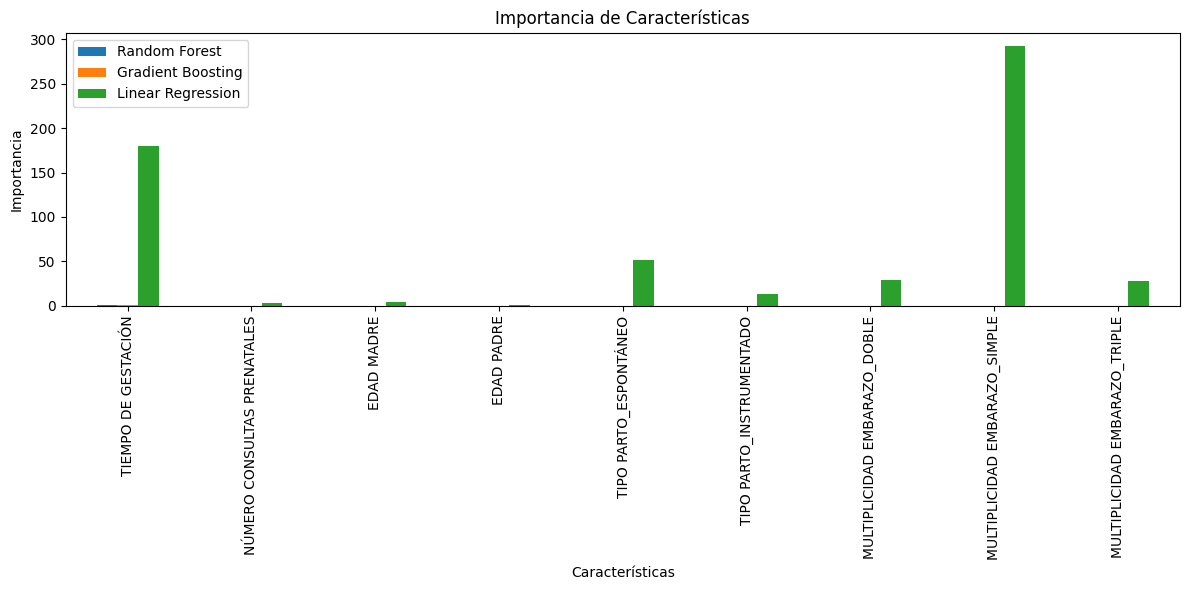

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error, explained_variance_score
import time
import matplotlib.pyplot as plt

# Cargar datos
data = cleaned_data

# Eliminar filas con valores nulos en las variables seleccionadas
cleaned_data = data.dropna(subset=['TIEMPO DE GESTACIÓN', 'NÚMERO CONSULTAS PRENATALES', 'EDAD MADRE', 'EDAD PADRE', 'TIPO PARTO', 'MULTIPLICIDAD EMBARAZO', 'PESO (Gramos)'])

# Aplicar One-Hot Encoding a las variables categóricas
categorical_cols = ['TIPO PARTO', 'MULTIPLICIDAD EMBARAZO']
data_encoded = pd.get_dummies(cleaned_data, columns=categorical_cols, drop_first=True)

# Definir las características y la variable objetivo
X = data_encoded[['TIEMPO DE GESTACIÓN', 'NÚMERO CONSULTAS PRENATALES', 'EDAD MADRE', 'EDAD PADRE'] +
                 [col for col in data_encoded.columns if col.startswith('TIPO PARTO_') or col.startswith('MULTIPLICIDAD EMBARAZO_')]]
y = data_encoded['PESO (Gramos)']

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Función para evaluar el rendimiento del modelo
def evaluate_model(model, X_train, X_test, y_train, y_test):
    start_time = time.time()
    model.fit(X_train, y_train)
    end_time = time.time()
    training_time = end_time - start_time
    y_pred = model.predict(X_test)
    metrics = {
        'MAE': mean_absolute_error(y_test, y_pred),
        'MSE': mean_squared_error(y_test, y_pred),
        'RMSE': mean_squared_error(y_test, y_pred, squared=False),
        'R2': r2_score(y_test, y_pred),
        'MAPE': mean_absolute_percentage_error(y_test, y_pred),
        'Explained Variance': explained_variance_score(y_test, y_pred),
        'Training Time (s)': training_time
    }
    return metrics

# Definir y evaluar modelos
models = {
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42),
    'Linear Regression': LinearRegression(),
    'Neural Network': MLPRegressor(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)
}

results = {model_name: evaluate_model(model, X_train, X_test, y_train, y_test) for model_name, model in models.items()}
results_df = pd.DataFrame(results).T
print(results_df)

# Importancia de características para Random Forest, Gradient Boosting y Linear Regression
feature_importances = {}

for model_name, model in zip(['Random Forest', 'Gradient Boosting', 'Linear Regression'], [models['Random Forest'], models['Gradient Boosting'], models['Linear Regression']]):
    if hasattr(model, 'feature_importances_'):
        model.fit(X_train, y_train)
        feature_importances[model_name] = model.feature_importances_
    elif model_name == 'Linear Regression':
        model.fit(X_train, y_train)
        feature_importances[model_name] = np.abs(model.coef_)  # Usar valores absolutos de los coeficientes

# Convertir las importancias de características en un DataFrame
importances_df = pd.DataFrame(feature_importances, index=X.columns)
importances_df.plot(kind='bar', figsize=(12, 6))
plt.title('Importancia de Características')
plt.ylabel('Importancia')
plt.xlabel('Características')
plt.legend(loc='best')
plt.tight_layout()
plt.show()


In [ ]:
results_df

,MAE,MSE,RMSE,R2,MAPE,Explained Variance,Training Time (s)
Random Forest,322.646817,166800.875201,408.412629,0.345961,0.106326,0.346139,14.442511
Gradient Boosting,287.595639,132768.208005,364.373720,0.479406,0.094974,0.479443,2.999254
Linear Regression,291.032860,136248.578375,369.118651,0.465759,0.096505,0.465800,0.070803
Neural Network,288.844734,135066.330398,367.513715,0.470395,0.094752,0.472289,206.614957


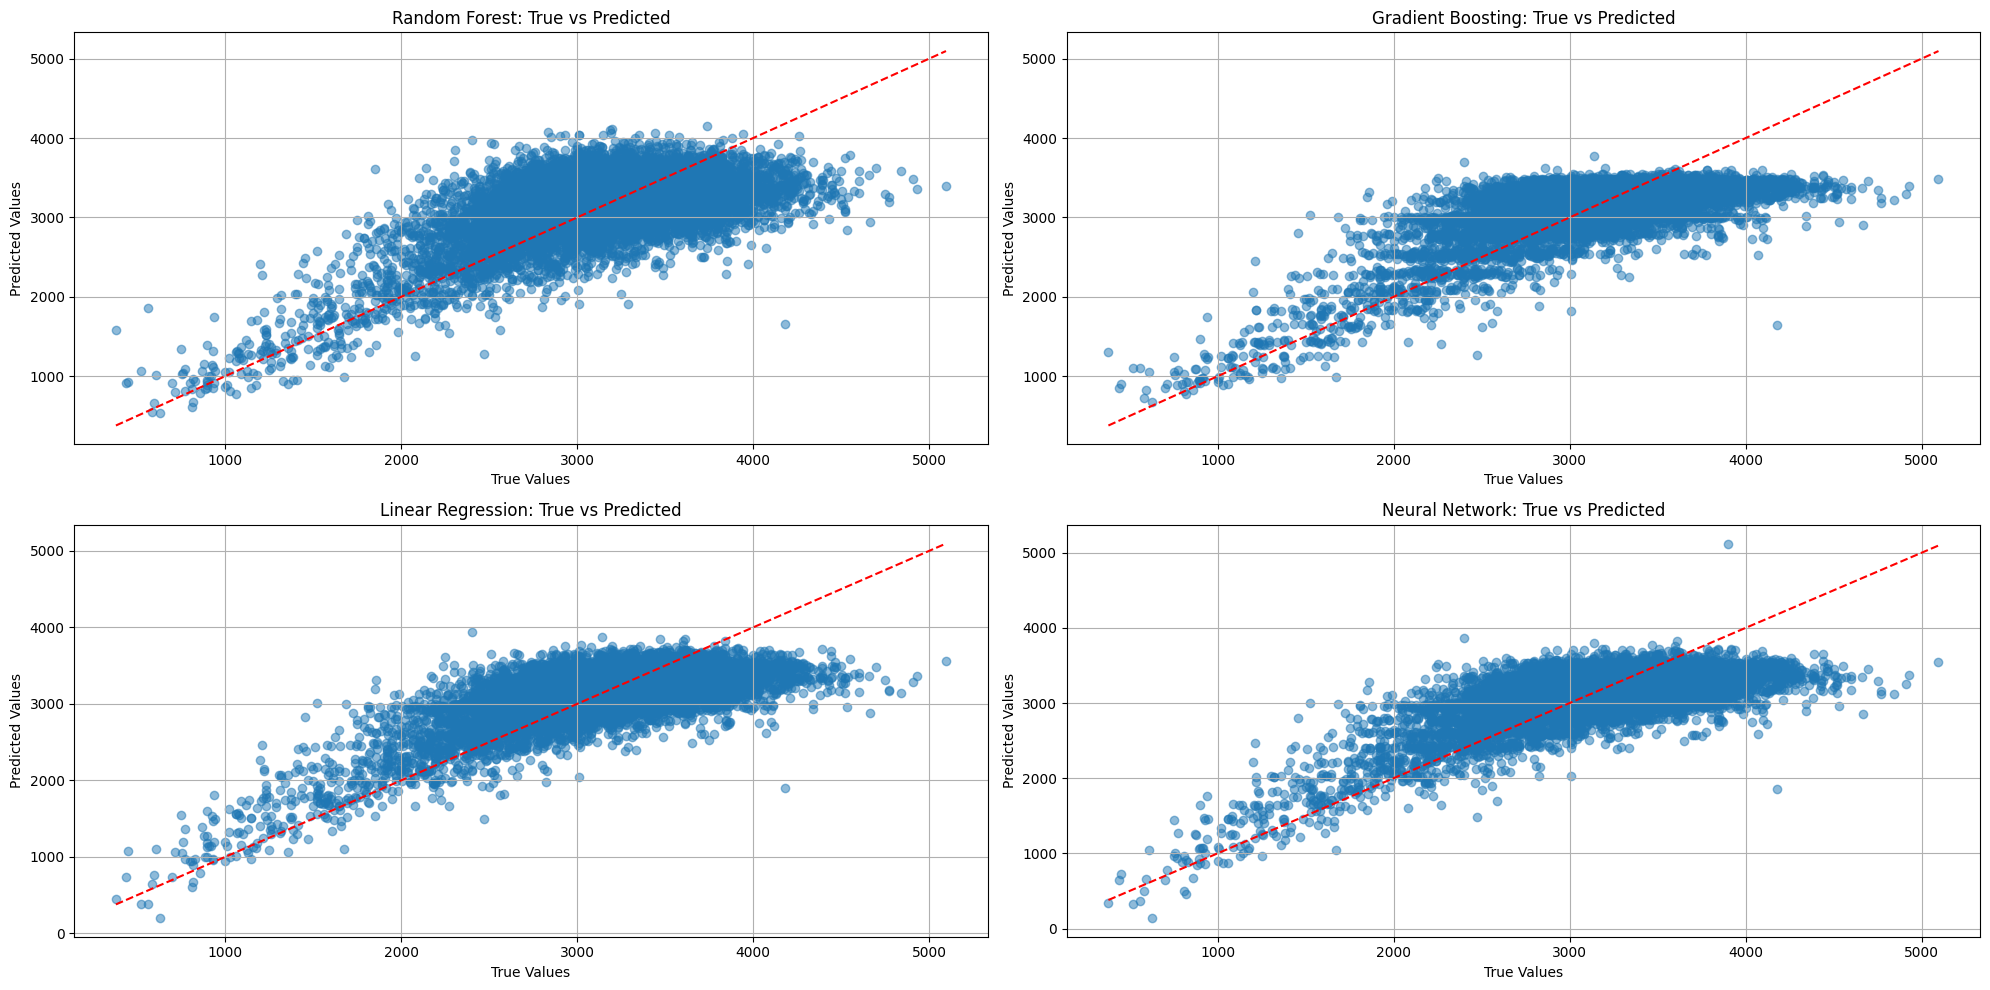

In [ ]:
import matplotlib.pyplot as plt

# Función para evaluar el rendimiento del modelo y retornar las predicciones
def evaluate_model_with_predictions(model, X_train, X_test, y_train, y_test):
    start_time = time.time()
    model.fit(X_train, y_train)
    end_time = time.time()
    training_time = end_time - start_time
    y_pred = model.predict(X_test)
    metrics = {
        'MAE': mean_absolute_error(y_test, y_pred),
        'MSE': mean_squared_error(y_test, y_pred),
        'RMSE': mean_squared_error(y_test, y_pred, squared=False),
        'R2': r2_score(y_test, y_pred),
        'MAPE': mean_absolute_percentage_error(y_test, y_pred),
        'Explained Variance': explained_variance_score(y_test, y_pred),
        'Training Time (s)': training_time
    }
    return metrics, y_pred

# Evaluar y obtener predicciones de modelos
predictions = {}
for model_name, model in models.items():
    metrics, y_pred = evaluate_model_with_predictions(model, X_train, X_test, y_train, y_test)
    predictions[model_name] = y_pred

# Crear gráficos de dispersión
plt.figure(figsize=(20, 10))

for i, (model_name, y_pred) in enumerate(predictions.items(), 1):
    plt.subplot(2, 2, i)
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    plt.title(f'{model_name}: True vs Predicted')
    plt.xlabel('True Values')
    plt.ylabel('Predicted Values')
    plt.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
data.describe()

,PESO (Gramos),TALLA (Centímetros),TIEMPO DE GESTACIÓN,NÚMERO CONSULTAS PRENATALES,EDAD MADRE,EDAD PADRE
count,65577.000000,65577.000000,65577.000000,65577.000000,65577.000000,65577.000000
mean,3157.542187,50.161429,38.212651,6.636061,26.509904,29.899416
std,508.454377,2.934706,1.856212,2.404959,6.330055,7.362657
min,290.000000,18.000000,19.000000,0.000000,12.000000,13.000000
25%,2900.000000,49.000000,38.000000,5.000000,22.000000,25.000000
50%,3200.000000,50.000000,39.000000,7.000000,26.000000,29.000000
75%,3480.000000,52.000000,39.000000,8.000000,31.000000,34.000000
max,5480.000000,64.000000,42.000000,25.000000,53.000000,99.000000




### Análisis de Rendimiento

1. **Precisión y Exactitud:**
   - **Gradient Boosting** y **Neural Network** tienen los mejores valores de MAE, MSE, RMSE y MAPE. Esto indica que son los modelos más precisos y exactos en términos de predicción del peso del bebé.
   - **Gradient Boosting** tiene el mejor R² (0.479), lo que sugiere que este modelo explica mejor la variabilidad en el peso del bebé en comparación con los otros modelos.

2. **Variabilidad Explicada:**
   - **Gradient Boosting** también tiene el mejor valor de **Explained Variance** (0.479), que mide la proporción de variabilidad en los datos que es capturada por el modelo. Esto refuerza la conclusión de que Gradient Boosting es el mejor modelo en términos de capacidad explicativa.

3. **Tiempo de Entrenamiento:**
   - **Linear Regression** tiene el tiempo de entrenamiento más rápido (0.071 segundos), seguido de **Gradient Boosting** (2.999 segundos).
   - **Neural Network** tiene el tiempo de entrenamiento más largo (206.61 segundos), lo que podría ser una desventaja si se requiere entrenamiento rápido o si se trabaja con grandes volúmenes de datos.

### Consideraciones Adicionales

1. **Trade-off entre Precisión y Tiempo de Entrenamiento:**
   - Aunque **Gradient Boosting** y **Neural Network** ofrecen las mejores métricas de rendimiento, **Gradient Boosting** es significativamente más rápido de entrenar. Esto lo hace una opción más práctica cuando se necesita un equilibrio entre precisión y eficiencia.
   - **Linear Regression**, a pesar de ser menos preciso, tiene un tiempo de entrenamiento extremadamente bajo, lo que puede ser útil en aplicaciones donde la rapidez es crítica y se puede tolerar una menor precisión.

2. **Importancia de Características:**
   - Es esencial revisar la importancia de las características para entender mejor qué factores están contribuyendo más a las predicciones del modelo. Esto también puede proporcionar información valiosa para la toma de decisiones en el contexto clínico o de investigación.

### Recomendaciones

1. **Modelo Sugerido:**
   - **Gradient Boosting** es el modelo recomendado, ya que ofrece el mejor equilibrio entre precisión, capacidad explicativa y tiempo de entrenamiento razonable.

2. **Mejoras Futuras:**
   - **Optimización de Hiperparámetros:** Se pueden realizar búsquedas de hiperparámetros (Grid Search o Random Search) para afinar aún más el rendimiento de los modelos.
   - **Ampliación de Características:** Considerar la inclusión de más características o la creación de nuevas características derivadas puede mejorar aún más la precisión de las predicciones.
   - **Ensemble Methods:** Combinar múltiples modelos (por ejemplo, stacking) podría mejorar el rendimiento general.

3. **Evaluación Continua:**
   - Implementar validación cruzada para garantizar la generalización del modelo y evitar sobreajuste.

### Conclusión

Los resultados indican que **Gradient Boosting** es el mejor modelo para predecir el peso del bebé, considerando tanto la precisión de las predicciones como la eficiencia en el entrenamiento. Este modelo debería ser el enfoque principal, con potenciales optimizaciones y expansiones en el futuro para mejorar aún más su rendimiento.


### Respuesta a Preguntas



In [ ]:
import pandas as pd

df = pd.read_csv("/content/new_buc_rionegro.csv")

<ipython-input-14-cd250ac4946e>:3: DtypeWarning: Columns (3,4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/content/new_buc_rionegro.csv")


In [ ]:
# Define a reasonable age range
min_age = 10
max_age = 100

# Remove outliers for EDAD MADRE and EDAD PADRE
cleaned_data = df[(df['EDAD MADRE'] >= min_age) & (df['EDAD MADRE'] <= max_age) &
                    (df['EDAD PADRE'] >= min_age) & (df['EDAD PADRE'] <= max_age)]

# Display the shape of the cleaned dataset
cleaned_data.shape

(65577, 13)

#### ¿Cómo cambia la salud de los bebés entre Bucaramanga y Rionegro?



In [ ]:
df.head()

,Unnamed: 0,DEPARTAMENTO,MUNICIPIO,AREA NACIMIENTO,SEXO,PESO (Gramos),TALLA (Centímetros),TIEMPO DE GESTACIÓN,NÚMERO CONSULTAS PRENATALES,TIPO PARTO,MULTIPLICIDAD EMBARAZO,EDAD MADRE,EDAD PADRE
0,0,SANTANDER,BUCARAMANGA,NaN,NaN,3520.0,53.0,40.0,12.0,ESPONTÁNEO,SIMPLE,21.0,21.0
1,1,SANTANDER,BUCARAMANGA,NaN,NaN,3180.0,52.0,39.0,11.0,ESPONTÁNEO,SIMPLE,24.0,40.0
2,2,SANTANDER,BUCARAMANGA,NaN,NaN,3000.0,50.0,38.0,10.0,ESPONTÁNEO,SIMPLE,25.0,26.0
3,3,SANTANDER,BUCARAMANGA,NaN,NaN,3540.0,55.0,38.0,10.0,CESÁREA,SIMPLE,28.0,29.0
4,4,SANTANDER,BUCARAMANGA,NaN,NaN,3430.0,53.0,39.0,6.0,CESÁREA,SIMPLE,30.0,34.0


In [ ]:
df.tail()

,Unnamed: 0,DEPARTAMENTO,MUNICIPIO,AREA NACIMIENTO,SEXO,PESO (Gramos),TALLA (Centímetros),TIEMPO DE GESTACIÓN,NÚMERO CONSULTAS PRENATALES,TIPO PARTO,MULTIPLICIDAD EMBARAZO,EDAD MADRE,EDAD PADRE
67646,67646,ANTIOQUIA,RIONEGRO,CABECERA MUNICIPAL,MASCULINO,3300.0,48.0,39.0,4.0,ESPONTÁNEO,SIMPLE,264.0,224.0
67647,67647,ANTIOQUIA,RIONEGRO,CABECERA MUNICIPAL,FEMENINO,2810.0,48.0,39.0,6.0,ESPONTÁNEO,SIMPLE,174.0,314.0
67648,67648,ANTIOQUIA,RIONEGRO,CABECERA MUNICIPAL,MASCULINO,3030.0,48.0,39.0,7.0,ESPONTÁNEO,SIMPLE,194.0,214.0
67649,67649,ANTIOQUIA,RIONEGRO,CABECERA MUNICIPAL,FEMENINO,2670.0,48.0,40.0,7.0,ESPONTÁNEO,SIMPLE,394.0,504.0
67650,67650,ANTIOQUIA,RIONEGRO,CABECERA MUNICIPAL,FEMENINO,3680.0,50.0,40.0,8.0,CESÁREA,SIMPLE,254.0,354.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67651 entries, 0 to 67650
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   67651 non-null  int64  
 1   DEPARTAMENTO                 67651 non-null  object 
 2   MUNICIPIO                    67651 non-null  object 
 3   AREA NACIMIENTO              2074 non-null   object 
 4   SEXO                         2074 non-null   object 
 5   PESO (Gramos)                67651 non-null  float64
 6   TALLA (Centímetros)          67651 non-null  float64
 7   TIEMPO DE GESTACIÓN          67651 non-null  float64
 8   NÚMERO CONSULTAS PRENATALES  67651 non-null  float64
 9   TIPO PARTO                   67651 non-null  object 
 10  MULTIPLICIDAD EMBARAZO       67651 non-null  object 
 11  EDAD MADRE                   67651 non-null  float64
 12  EDAD PADRE                   67651 non-null  float64
dtypes: float64(6), i

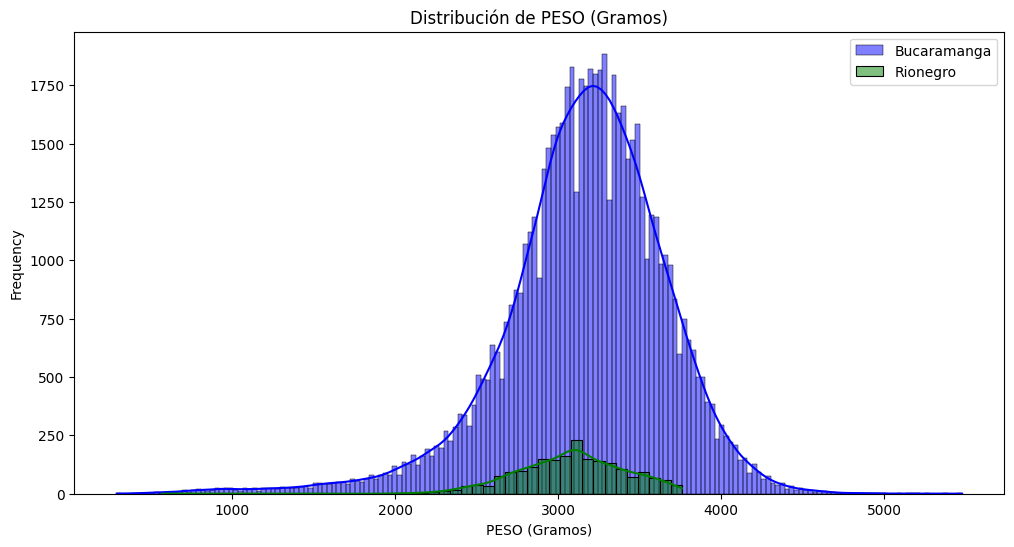

Estadísticas descriptivas para PESO (Gramos) en Bucaramanga:
 Media: 3157.54
 Mediana: 3200.00
 Desviación Estándar: 508.47
 Mínimo: 290.00
 Máximo: 5480.00

Estadísticas descriptivas para PESO (Gramos) en Rionegro:
 Media: 3080.40
 Mediana: 3102.50
 Desviación Estándar: 331.95
 Mínimo: 570.00
 Máximo: 3760.00



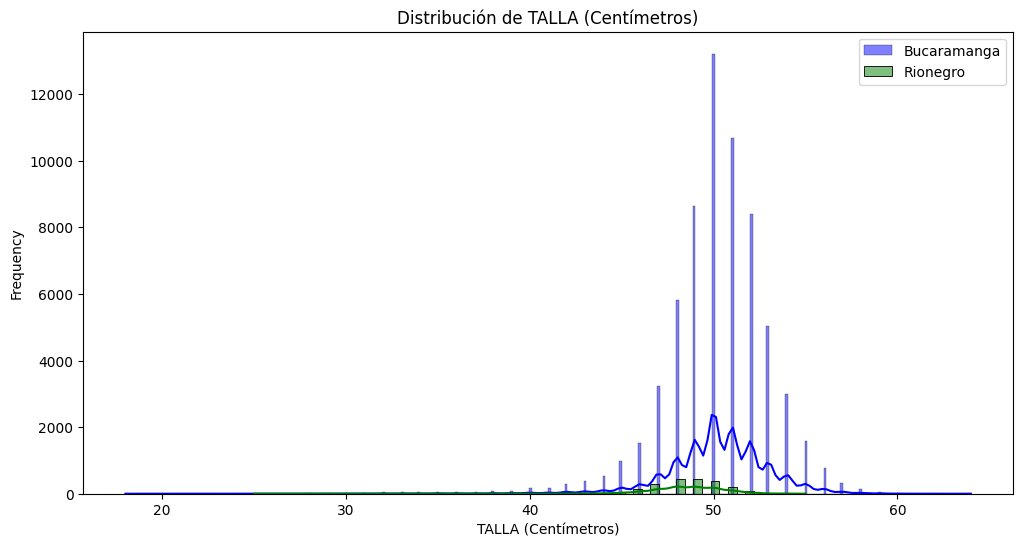

Estadísticas descriptivas para TALLA (Centímetros) en Bucaramanga:
 Media: 50.16
 Mediana: 50.00
 Desviación Estándar: 2.93
 Mínimo: 18.00
 Máximo: 64.00

Estadísticas descriptivas para TALLA (Centímetros) en Rionegro:
 Media: 48.62
 Mediana: 49.00
 Desviación Estándar: 1.95
 Mínimo: 25.00
 Máximo: 55.00



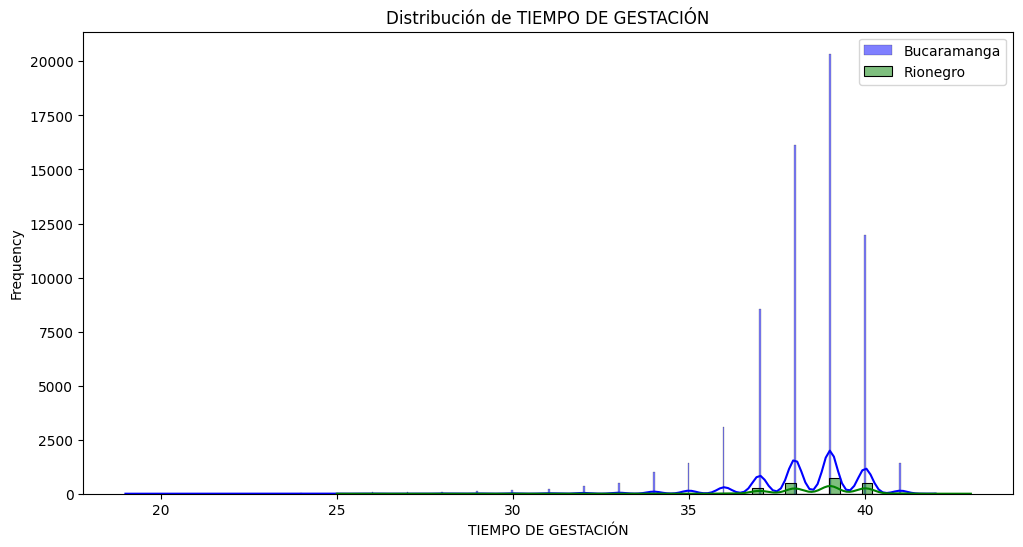

Estadísticas descriptivas para TIEMPO DE GESTACIÓN en Bucaramanga:
 Media: 38.21
 Mediana: 39.00
 Desviación Estándar: 1.86
 Mínimo: 19.00
 Máximo: 42.00

Estadísticas descriptivas para TIEMPO DE GESTACIÓN en Rionegro:
 Media: 38.72
 Mediana: 39.00
 Desviación Estándar: 1.17
 Mínimo: 25.00
 Máximo: 43.00



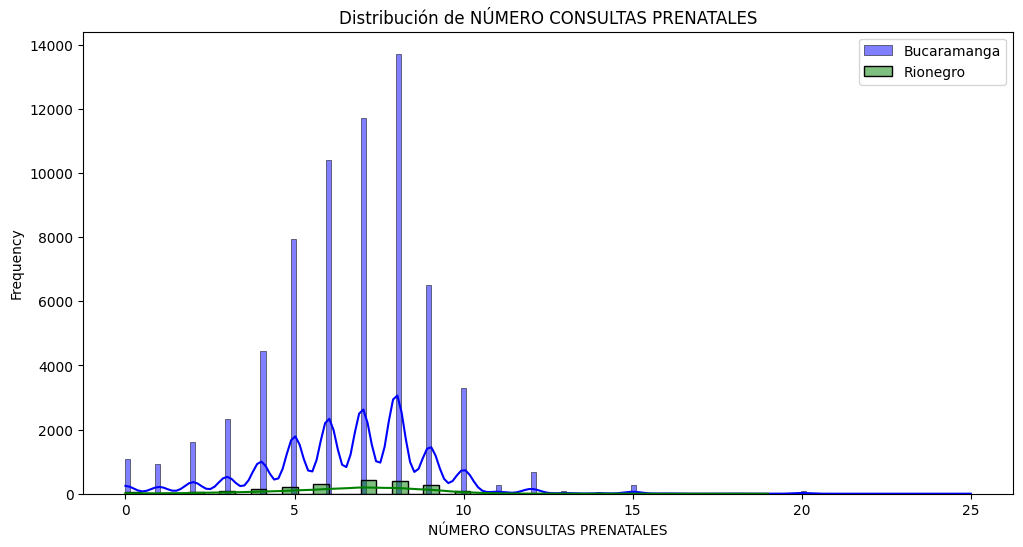

Estadísticas descriptivas para NÚMERO CONSULTAS PRENATALES en Bucaramanga:
 Media: 6.64
 Mediana: 7.00
 Desviación Estándar: 2.41
 Mínimo: 0.00
 Máximo: 25.00

Estadísticas descriptivas para NÚMERO CONSULTAS PRENATALES en Rionegro:
 Media: 6.61
 Mediana: 7.00
 Desviación Estándar: 2.26
 Mínimo: 0.00
 Máximo: 19.00



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar datos
data = df

# Filtrar datos por municipio
data_bucaramanga = data[data['MUNICIPIO'] == 'BUCARAMANGA']
data_rionegro = data[data['MUNICIPIO'] == 'RIONEGRO']

# Función para crear histogramas
def plot_histograms(data1, data2, column, title, xlabel):
    plt.figure(figsize=(12, 6))
    sns.histplot(data1[column].dropna(), color='blue', label='Bucaramanga', kde=True)
    sns.histplot(data2[column].dropna(), color='green', label='Rionegro', kde=True)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

# Función para calcular estadísticas descriptivas
def descriptive_statistics(data, column, city):
    stats = data[column].describe()
    print(f"Estadísticas descriptivas para {column} en {city}:")
    print(f" Media: {stats['mean']:.2f}")
    print(f" Mediana: {data[column].median():.2f}")
    print(f" Desviación Estándar: {stats['std']:.2f}")
    print(f" Mínimo: {stats['min']:.2f}")
    print(f" Máximo: {stats['max']:.2f}\n")

# Ejecutar análisis para las variables de interés
columns = ['PESO (Gramos)', 'TALLA (Centímetros)', 'TIEMPO DE GESTACIÓN', 'NÚMERO CONSULTAS PRENATALES']
for column in columns:
    plot_histograms(data_bucaramanga, data_rionegro, column, f'Distribución de {column}', column)
    descriptive_statistics(data_bucaramanga, column, 'Bucaramanga')
    descriptive_statistics(data_rionegro, column, 'Rionegro')


## ¿Cómo cambia la salud de los bebés entre Bucaramanga y Rionegro?

### **Diferencias Marginales en el Peso al Nacer**
- **Promedio en Bucaramanga**: 3157.54 gramos.
- **Promedio en Rionegro**: 3080.40 gramos.
- La mayor desviación estándar en Bucaramanga indica una mayor variabilidad en el peso al nacer, posiblemente reflejando diferencias en condiciones nutricionales o socioeconómicas.

### **Superioridad en Talla al Nacer en Bucaramanga**
- **Promedio en Bucaramanga**: 50.16 centímetros.
- **Promedio en Rionegro**: 48.62 centímetros.
- Un rango más amplio en Bucaramanga sugiere un desarrollo fetal más completo en términos de crecimiento físico en este municipio.

###  **Consistencia en el Tiempo de Gestación en Rionegro**
- **Duración media del embarazo es similar**, con medianas cercanas a 39 semanas.
- Rionegro muestra una menor variabilidad (desviación estándar de 1.17 semanas) comparado con Bucaramanga (1.86 semanas), indicando una mayor uniformidad en la duración de los embarazos.

### **Acceso Uniforme a la Atención Prenatal**
- **Número medio de consultas prenatales**: Alrededor de 6.6 en ambos municipios.
- La similitud en el número de consultas prenatales entre Bucaramanga y Rionegro muestra que el acceso a la atención prenatal es uniforme, destacando una cobertura equitativa de servicios de salud prenatal.


En general, aunque existen algunas variaciones entre Bucaramanga y Rionegro en términos de peso y talla al nacer, el cuidado prenatal medido por las consultas parece ser uniformemente distribuido, sugiriendo que las diferencias observadas podrían ser influenciadas por factores socioeconómicos o ambientales más que por la calidad de la atención médica prenatal.

¿Qué factores están asociados con los nacimientos prematuros (período de gestación menor a 37 semanas) en Bucaramanga y Río Negro?



       PESO (Gramos)  TALLA (Centímetros)   EDAD MADRE  \
count    7139.000000          7139.000000  7139.000000   
mean     2371.211794            46.261101    27.616333   
std       613.449912             4.495060    15.420310   
min       290.000000            18.000000    12.000000   
25%      2040.000000            44.000000    22.000000   
50%      2450.000000            47.000000    26.000000   
75%      2790.000000            49.000000    32.000000   
max      4440.000000            59.000000   414.000000   

       NÚMERO CONSULTAS PRENATALES  TIEMPO DE GESTACIÓN   EDAD PADRE  
count                  7139.000000          7139.000000  7139.000000  
mean                      5.862726            34.305085    31.007144  
std                       2.804638             2.418336    17.833350  
min                       0.000000            19.000000    -4.000000  
25%                       4.000000            34.000000    25.000000  
50%                       6.000000            35.00

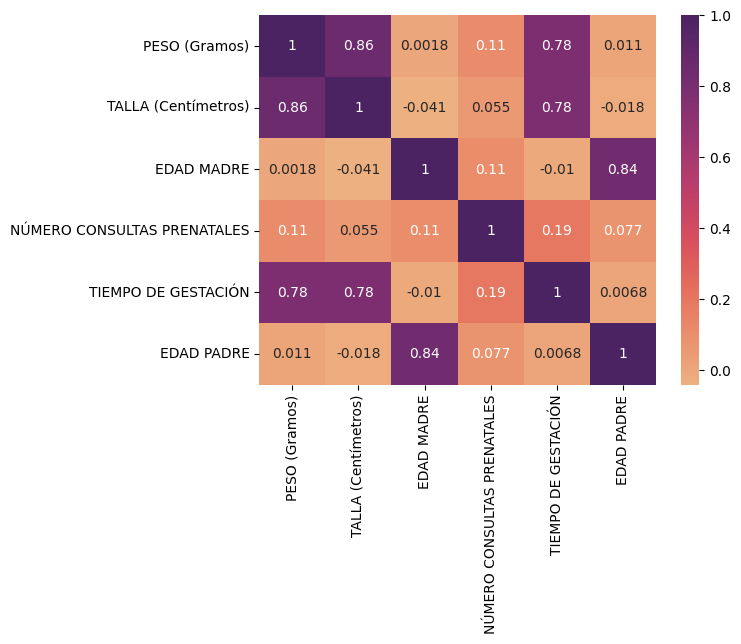

In [ ]:
# Filtrado para nacimientos prematuros
premature_births = data[data['TIEMPO DE GESTACIÓN'] < 37]

# Filtrado para nacimientos prematuros
premature_births = data[data['TIEMPO DE GESTACIÓN'] < 37]

# Asegurarse de que solo se consideren columnas numéricas para la correlación
# Supongamos que las columnas relevantes son 'PESO (Gramos)', 'TALLA (Centímetros)', 'EDAD MADRE'
numeric_columns = ['PESO (Gramos)', 'TALLA (Centímetros)', 'EDAD MADRE', "NÚMERO CONSULTAS PRENATALES" ,'TIEMPO DE GESTACIÓN', "EDAD PADRE"]
premature_births_numeric = premature_births[numeric_columns]

# Análisis exploratorio de las columnas numéricas
print(premature_births_numeric.describe())

# Correlaciones
correlation_matrix = premature_births_numeric.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="flare")
plt.show()

## Factores Asociados con los Nacimientos Prematuros en Bucaramanga y Rionegro

Basado en el análisis de la matriz de correlación que incluye variables como el peso al nacer, la talla al nacer, el número de consultas prenatales, y el tiempo de gestación, podemos identificar algunos factores asociados con los nacimientos prematuros:

### 1. Peso y Talla al Nacer
- **Correlación Fuerte**: Tanto el peso como la talla al nacer muestran fuertes correlaciones positivas (0.78) con el tiempo de gestación. Esto indica que menores pesos y tallas al nacer están comúnmente asociados con nacimientos prematuros, reflejando una menor duración del embarazo y menos tiempo para el desarrollo fetal.

### 2. Número de Consultas Prenatales
- **Correlación Positiva Débil**: Existe una correlación positiva débil (0.19) entre el número de consultas prenatales y el tiempo de gestación. Aunque la correlación no es fuerte, sugiere que un mayor número de consultas podría estar asociado con un aumento en la duración del embarazo, posiblemente debido a una mejor vigilancia y manejo del embarazo.

### Recomendaciones Basadas en el Análisis
- **Promover el Aumento de las Consultas Prenatales**: Fomentar la asistencia regular a las consultas prenatales puede ayudar a gestionar mejor los riesgos durante el embarazo y prevenir complicaciones que podrían llevar a un parto prematuro.
- **Investigar Factores Contribuyentes**: Es importante realizar más estudios para entender qué aspectos de las consultas prenatales son más efectivos en extender la duración del embarazo y cómo estos factores podrían variar entre diferentes grupos de población.

Estas conclusiones nos proporcionan una base para diseñar e implementar intervenciones dirigidas a reducir la incidencia de nacimientos prematuros en estas regiones.


Trabajo en Equipo

- Juan Diego:
- Samuel:
- Juan Lopez: Desarrollo y evaluacion de modelos de machine learning asi como respeusta a preguntas problema.